In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BoundaryNorm, to_rgba, ListedColormap
obs = pd.read_csv('../Resources/observed_onset.csv')
warm_obs = obs[obs['OBS_PHASE'] == 'warm']
neutral_obs = obs[obs['OBS_PHASE'] == 'neutral']
cold_obs = obs[obs['OBS_PHASE'] == 'cold']
monthly_obs = pd.read_csv('../Resources/monthly_obs.csv')

warm_mean_obs = pd.read_csv('../Resources/warm_mean_obs.csv')
neutral_mean_obs = pd.read_csv('../Resources/neutral_mean_obs.csv')
cold_mean_obs = pd.read_csv('../Resources/cold_mean_obs.csv')

gfdl_warm_mean = pd.read_csv('../Resources/gfdl_warm_mean.csv')
gfdl_neutral_mean = pd.read_csv('../Resources/gfdl_neutral_mean.csv')
gfdl_cold_mean = pd.read_csv('../Resources/gfdl_cold_mean.csv')


gfdl_warm_onset_mean= pd.read_csv('../Resources/gfdl_warm_onset_mean.csv')
gfdl_all_onset_mean= pd.read_csv('../Resources/gfdl_neutral_onset_mean.csv')
gfdl_cold_onset_mean= pd.read_csv('../Resources/gfdl_cold_onset_mean.csv')
gfdl_warm_onset = pd.read_csv('../Resources/gfdl_warm_onset.csv')
gfdl_all_onset = pd.read_csv ('../Resources/gfdl_neutral_onset.csv')
gfdl_cold_onset= pd.read_csv('../Resources/gfdl_cold_onset.csv')

#import model LDC data
gfdl = pd.read_csv('../Resources/GFDL_SPEAR_FULL_LDC.csv')
gfdl_stat = pd.read_csv('../Resources/gfdl_stat.csv')
nasa = pd.read_csv('../Resources/NASA_GEOSS2S_FULL_LDC.csv')
nasa_stat = pd.read_csv('../Resources/nasa_stat.csv')
canada = pd.read_csv('../Resources/CanSIPS_IC4_FULL_LDC.csv')
canada_stat = pd.read_csv('../Resources/canada_stat.csv')
canada['LDC_SST_CanSIPS_IC4'] = canada['LDC_SST_CanSIPS_IC4'] - 273.15
canada['LDC_SST_CanSIPS_IC4_ONETWO'] = canada['LDC_SST_CanSIPS_IC4_ONETWO'] - 273.15
canada['LDC_SST_CanSIPS_IC4_THREE'] = canada['LDC_SST_CanSIPS_IC4_THREE'] - 273.15
canada['LDC_SST_CanSIPS_IC4_FOUR'] = canada['LDC_SST_CanSIPS_IC4_FOUR'] - 273.15
ncep = pd.read_csv('../Resources/NCEP_CFSv2_FULL_LDC.csv')
ncep_stat = pd.read_csv('../Resources/ncep_stat.csv')
cola = pd.read_csv('../Resources/COLA_CESM1_FULL_LDC.csv')
cola_stat = pd.read_csv('../Resources/cola_stat.csv')

#import model LDC data for canadian sisters
canesm = pd.read_csv('../Resources/CanESM5_FULL_LDC.csv')
canesm_stat = pd.read_csv('../Resources/canesm_stat.csv')
canesm['LDC_SST_CanESM5'] = canesm['LDC_SST_CanESM5'] - 273.15
canesm['LDC_SST_CanESM5_ONETWO'] = canesm['LDC_SST_CanESM5_ONETWO'] - 273.15
canesm['LDC_SST_CanESM5_THREE'] = canesm['LDC_SST_CanESM5_THREE'] - 273.15
canesm['LDC_SST_CanESM5_FOUR'] = canesm['LDC_SST_CanESM5_FOUR'] - 273.15
nemo = pd.read_csv('../Resources/GEM52_NEMO_FULL_LDC.csv')
nemo['LDC_SST_GEM52_NEMO'] = nemo['LDC_SST_GEM52_NEMO'] - 273.15
nemo_stat = pd.read_csv('../Resources/nemo_stat.csv')
nemo['LDC_SST_GEM52_NEMO_ONETWO'] = nemo['LDC_SST_GEM52_NEMO_ONETWO'] - 273.15
nemo['LDC_SST_GEM52_NEMO_THREE'] = nemo['LDC_SST_GEM52_NEMO_THREE'] - 273.15
nemo['LDC_SST_GEM52_NEMO_FOUR'] = nemo['LDC_SST_GEM52_NEMO_FOUR'] - 273.15

#manage obs
obs.rename(columns={'YR': 'year', 'MON': 'month', 'DAY': 'day'}, inplace=True)
# Combine year, month, and day into a single datetime column
obs['TAR'] = pd.to_datetime(obs[['year', 'month', 'day']])
obs = obs[['TAR', 'OBS_NINO3.4_L3', 'OBS_PHASE']]
obs_dict = obs.set_index('TAR')['OBS_NINO3.4_L3'].to_dict()

#input method: 1993 JAS -> yr = 1993, mon = 8, day = 15
warm_onset_1 = {"year" : 1991, "month" : 6, "day" : 15}
warm_onset_2 = {"year" : 1994, "month" : 9, "day" : 15}
warm_onset_3 = {"year" : 1997, "month" : 5, "day" : 15}
warm_onset_4 = {"year" : 2002, "month" : 6, "day" : 15}
warm_onset_5 = {"year" : 2004, "month" : 7, "day" : 15}
warm_onset_6 = {"year" : 2006, "month" : 9, "day" : 15}
warm_onset_7 = {"year" : 2009, "month" : 7, "day" : 15}
warm_onset_8 = {"year" : 2014, "month" : 10, "day" : 15}
warm_onset_9 = {"year" : 2018, "month" : 9, "day" : 15}
#warm_onset_10 = {"year" : 2023, "month" : 5, "day" : 15}
warm_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9
               ]

cold_onset_1 = {"year" : 1995, "month" : 8, "day" : 15}
cold_onset_2 = {"year" : 1998, "month" : 7, "day" : 15}
cold_onset_3 = {"year" : 2005, "month" : 11, "day" : 15}
cold_onset_4 = {"year" : 2007, "month" : 6, "day" : 15}
cold_onset_5 = {"year" : 2008, "month" : 11, "day" : 15}
cold_onset_6 = {"year" : 2010, "month" : 6, "day" : 15}
#cold_onset_7 = {"year" : 2011, "month" : 7, "day" : 15}
cold_onset_7 = {"year" : 2016, "month" : 8, "day" : 15}
cold_onset_8 = {"year" : 2017, "month" : 10, "day" : 15}
cold_onset_9 = {"year" : 2020, "month" : 8, "day" : 15}
cold_onsets = [cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
               ]

all_onsets = [warm_onset_1, warm_onset_2, warm_onset_3,
               warm_onset_4, warm_onset_5, warm_onset_6,
               warm_onset_7, warm_onset_8, warm_onset_9, 
              cold_onset_1, cold_onset_2, cold_onset_3,
               cold_onset_4, cold_onset_5, cold_onset_6,
               cold_onset_7, cold_onset_8, cold_onset_9,
              ]

In [240]:
#process gfdl data
def gfdl_onset_finder(dict):

    gfdl_temp = gfdl.copy()

    # Query the DataFrame
    gfdl_onset = gfdl_temp[
        (gfdl_temp['TAR'].dt.year == dict["year"]) &
        (gfdl_temp['TAR'].dt.month == dict["month"]) &
        (gfdl_temp['TAR'].dt.day == dict["day"])
    ]
    return gfdl_onset
    
gfdl['MON'] = pd.to_datetime(gfdl['MON'], format = '%H%M %d %b %Y')
gfdl['START'] = gfdl['MON'].dt.month
gfdl['TARGET'] = ((gfdl['START'] + gfdl['L']).astype(int))%12
gfdl['TARGET'] = gfdl['TARGET'].apply(lambda x: 12 if x == 0 else x)
gfdl['TAR'] = gfdl.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
gfdl['TAR'] = gfdl.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
gfdl['SZN'] = gfdl['TARGET'].map(month_to_season)
gfdl = gfdl[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GFDL_SPEAR']]
gfdl = gfdl.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the gfdl DataFrame
gfdl.loc[:, 'OBS_NINO3.4_L3'] = gfdl['TAR'].map(obs_dict)

gfdl_warm_onset_dfs = {}
gfdl_cold_onset_dfs = {}
gfdl_all_onset_dfs = {}

j = 1
for i in warm_onsets:
    gfdl_warm_onset_dfs[f'{j}'] = gfdl_onset_finder(i)
    j += 1

gfdl_warm_onset = pd.concat([gfdl_warm_onset_dfs[key] for key in gfdl_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    gfdl_cold_onset_dfs[f'{j}'] = gfdl_onset_finder(i)
    j += 1
gfdl_cold_onset = pd.concat([gfdl_cold_onset_dfs[key] for key in gfdl_cold_onset_dfs.keys()], ignore_index=True)


gfdl_all_onset = pd.concat([gfdl_cold_onset,gfdl_warm_onset], ignore_index=True)

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_all_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['ANOM_GFDL_SPEAR'] = gfdl_all_onset['LDC_SST_GFDL_SPEAR'] - gfdl_all_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_all_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['ANOM_OBS'] = gfdl_all_onset['OBS_NINO3.4_L3'] - gfdl_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_all_onset['VARIANCE3.4_L3'] = gfdl_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_all_onset.reset_index(drop=True, inplace=True)
gfdl_all_onset['SESS'] = 1-((gfdl_all_onset['ANOM_GFDL_SPEAR']-gfdl_all_onset['ANOM_OBS'])*(gfdl_all_onset['ANOM_GFDL_SPEAR']-gfdl_all_onset['ANOM_OBS'])/(gfdl_all_onset['VARIANCE3.4_L3']))

#4
gfdl_all_onset['Year'] = gfdl_all_onset['TAR'].dt.year
gfdl_all_onset['ONSET'] = gfdl_all_onset['Year'].astype(str) + ' ' + gfdl_all_onset['SZN']
gfdl_all_onset = gfdl_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_warm_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['ANOM_GFDL_SPEAR'] = gfdl_warm_onset['LDC_SST_GFDL_SPEAR'] - gfdl_warm_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_warm_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['ANOM_OBS'] = gfdl_warm_onset['OBS_NINO3.4_L3'] - gfdl_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_warm_onset['VARIANCE3.4_L3'] = gfdl_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_warm_onset.reset_index(drop=True, inplace=True)
gfdl_warm_onset['SESS'] = 1-((gfdl_warm_onset['ANOM_GFDL_SPEAR']-gfdl_warm_onset['ANOM_OBS'])*(gfdl_warm_onset['ANOM_GFDL_SPEAR']-gfdl_warm_onset['ANOM_OBS'])/(gfdl_warm_onset['VARIANCE3.4_L3']))

#4
gfdl_warm_onset['Year'] = gfdl_warm_onset['TAR'].dt.year
gfdl_warm_onset['ONSET'] = gfdl_warm_onset['Year'].astype(str) + ' ' + gfdl_warm_onset['SZN']
gfdl_warm_onset = gfdl_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = gfdl_stat.set_index(['L', 'SZN'])['MEAN_SST_GFDL_SPEAR']
gfdl_cold_onset['MEAN_SST_GFDL_SPEAR'] = gfdl_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['ANOM_GFDL_SPEAR'] = gfdl_cold_onset['LDC_SST_GFDL_SPEAR'] - gfdl_cold_onset['MEAN_SST_GFDL_SPEAR']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
gfdl_cold_onset['MEAN_OBS_NINO3.4_L3'] = gfdl_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['ANOM_OBS'] = gfdl_cold_onset['OBS_NINO3.4_L3'] - gfdl_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
gfdl_cold_onset['VARIANCE3.4_L3'] = gfdl_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
gfdl_cold_onset.reset_index(drop=True, inplace=True)
gfdl_cold_onset['SESS'] = 1-((gfdl_cold_onset['ANOM_GFDL_SPEAR']-gfdl_cold_onset['ANOM_OBS'])*(gfdl_cold_onset['ANOM_GFDL_SPEAR']-gfdl_cold_onset['ANOM_OBS'])/(gfdl_cold_onset['VARIANCE3.4_L3']))

#4
gfdl_cold_onset['Year'] = gfdl_cold_onset['TAR'].dt.year
gfdl_cold_onset['ONSET'] = gfdl_cold_onset['Year'].astype(str) + ' ' + gfdl_cold_onset['SZN']
gfdl_cold_onset = gfdl_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#gfdl_warm_onset
lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
gfdl_all_onset_dfs = {}
gfdl_cold_onset_dfs = {}
gfdl_warm_onset_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_all_onset[gfdl_all_onset['L'] == i].copy()
    lead = int(i)
    gfdl_all_onset_dfs[f'lead{lead}'] = filtered_gfdl

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_cold_onset[gfdl_cold_onset['L'] == i].copy()
    lead = int(i)
    gfdl_cold_onset_dfs[f'lead{lead}'] = filtered_gfdl

# Loop through lead times
for i in lead_times:
    filtered_gfdl = gfdl_warm_onset[gfdl_warm_onset['L'] == i].copy()
    lead = int(i)
    gfdl_warm_onset_dfs[f'lead{lead}'] = filtered_gfdl
    
gfdl_warm_onset_dfs['lead5']



L        MON        TAR     ONSET      SESS
0   5.5 1991-01-01 1991-06-15  1991 MJJ -0.970701
10  5.5 1994-04-01 1994-09-15  1994 ASO -0.200460
20  5.5 1996-12-01 1997-05-15  1997 AMJ  0.255088
30  5.5 2002-01-01 2002-06-15  2002 MJJ  0.845844
40  5.5 2004-02-01 2004-07-15  2004 JJA  0.688538
50  5.5 2006-04-01 2006-09-15  2006 ASO  0.606789
60  5.5 2009-02-01 2009-07-15  2009 JJA  0.861450
70  5.5 2014-05-01 2014-10-15  2014 SON  0.745304
80  5.5 2018-04-01 2018-09-15  2018 ASO  0.790188

In [241]:
#process ncep data
def ncep_onset_finder(dict):

    ncep_temp = ncep.copy()

    # Query the DataFrame
    ncep_onset = ncep_temp[
        (ncep_temp['TAR'].dt.year == dict["year"]) &
        (ncep_temp['TAR'].dt.month == dict["month"]) &
        (ncep_temp['TAR'].dt.day == dict["day"])
    ]
    return ncep_onset
    
ncep['MON'] = pd.to_datetime(ncep['MON'], format = '%H%M %d %b %Y')
ncep['START'] = ncep['MON'].dt.month
ncep['TARGET'] = ((ncep['START'] + ncep['L']).astype(int))%12
ncep['TARGET'] = ncep['TARGET'].apply(lambda x: 12 if x == 0 else x)
ncep['TAR'] = ncep.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
ncep['TAR'] = ncep.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
ncep['SZN'] = ncep['TARGET'].map(month_to_season)
ncep = ncep[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NCEP_CFSv2']]
ncep = ncep.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the ncep DataFrame
ncep.loc[:, 'OBS_NINO3.4_L3'] = ncep['TAR'].map(obs_dict)

ncep_warm_onset_dfs = {}
ncep_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    ncep_warm_onset_dfs[f'{j}'] = ncep_onset_finder(i)
    j += 1

ncep_warm_onset = pd.concat([ncep_warm_onset_dfs[key] for key in ncep_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    ncep_cold_onset_dfs[f'{j}'] = ncep_onset_finder(i)
    j += 1

ncep_cold_onset = pd.concat([ncep_cold_onset_dfs[key] for key in ncep_cold_onset_dfs.keys()], ignore_index=True)

ncep_all_onset = pd.concat([ncep_cold_onset,ncep_warm_onset], ignore_index=True)

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_all_onset['MEAN_SST_NCEP_CFSv2'] = ncep_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['ANOM_NCEP_CFSv2'] = ncep_all_onset['LDC_SST_NCEP_CFSv2'] - ncep_all_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_all_onset['MEAN_OBS_NINO3.4_L3'] = ncep_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['ANOM_OBS'] = ncep_all_onset['OBS_NINO3.4_L3'] - ncep_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_all_onset['VARIANCE3.4_L3'] = ncep_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_all_onset.reset_index(drop=True, inplace=True)
ncep_all_onset['SESS'] = 1-((ncep_all_onset['ANOM_NCEP_CFSv2']-ncep_all_onset['ANOM_OBS'])*(ncep_all_onset['ANOM_NCEP_CFSv2']-ncep_all_onset['ANOM_OBS'])/(ncep_all_onset['VARIANCE3.4_L3']))

#4
ncep_all_onset['Year'] = ncep_all_onset['TAR'].dt.year
ncep_all_onset['ONSET'] = ncep_all_onset['Year'].astype(str) + ' ' + ncep_all_onset['SZN']
ncep_all_onset = ncep_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_warm_onset['MEAN_SST_NCEP_CFSv2'] = ncep_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['ANOM_NCEP_CFSv2'] = ncep_warm_onset['LDC_SST_NCEP_CFSv2'] - ncep_warm_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_warm_onset['MEAN_OBS_NINO3.4_L3'] = ncep_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['ANOM_OBS'] = ncep_warm_onset['OBS_NINO3.4_L3'] - ncep_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_warm_onset['VARIANCE3.4_L3'] = ncep_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_warm_onset.reset_index(drop=True, inplace=True)
ncep_warm_onset['SESS'] = 1-((ncep_warm_onset['ANOM_NCEP_CFSv2']-ncep_warm_onset['ANOM_OBS'])*(ncep_warm_onset['ANOM_NCEP_CFSv2']-ncep_warm_onset['ANOM_OBS'])/(ncep_warm_onset['VARIANCE3.4_L3']))

#4
ncep_warm_onset['Year'] = ncep_warm_onset['TAR'].dt.year
ncep_warm_onset['ONSET'] = ncep_warm_onset['Year'].astype(str) + ' ' + ncep_warm_onset['SZN']
ncep_warm_onset = ncep_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = ncep_stat.set_index(['L', 'SZN'])['MEAN_SST_NCEP_CFSv2']
ncep_cold_onset['MEAN_SST_NCEP_CFSv2'] = ncep_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['ANOM_NCEP_CFSv2'] = ncep_cold_onset['LDC_SST_NCEP_CFSv2'] - ncep_cold_onset['MEAN_SST_NCEP_CFSv2']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
ncep_cold_onset['MEAN_OBS_NINO3.4_L3'] = ncep_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['ANOM_OBS'] = ncep_cold_onset['OBS_NINO3.4_L3'] - ncep_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
ncep_cold_onset['VARIANCE3.4_L3'] = ncep_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
ncep_cold_onset.reset_index(drop=True, inplace=True)
ncep_cold_onset['SESS'] = 1-((ncep_cold_onset['ANOM_NCEP_CFSv2']-ncep_cold_onset['ANOM_OBS'])*(ncep_cold_onset['ANOM_NCEP_CFSv2']-ncep_cold_onset['ANOM_OBS'])/(ncep_cold_onset['VARIANCE3.4_L3']))

#4
ncep_cold_onset['Year'] = ncep_cold_onset['TAR'].dt.year
ncep_cold_onset['ONSET'] = ncep_cold_onset['Year'].astype(str) + ' ' + ncep_cold_onset['SZN']
ncep_cold_onset = ncep_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#ncep_warm_onset
lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
ncep_all_onset_dfs = {}
ncep_cold_onset_dfs = {}
ncep_warm_onset_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_all_onset[ncep_all_onset['L'] == i].copy()
    lead = int(i)
    ncep_all_onset_dfs[f'lead{lead}'] = filtered_ncep

# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_cold_onset[ncep_cold_onset['L'] == i].copy()
    lead = int(i)
    ncep_cold_onset_dfs[f'lead{lead}'] = filtered_ncep

# Loop through lead times
for i in lead_times:
    filtered_ncep = ncep_warm_onset[ncep_warm_onset['L'] == i].copy()
    lead = int(i)
    ncep_warm_onset_dfs[f'lead{lead}'] = filtered_ncep
    
ncep_warm_onset_dfs['lead5']


L        MON        TAR     ONSET      SESS
0   5.5 1991-01-01 1991-06-15  1991 MJJ -1.158360
8   5.5 1994-04-01 1994-09-15  1994 ASO -1.002953
16  5.5 1996-12-01 1997-05-15  1997 AMJ -0.072748
24  5.5 2002-01-01 2002-06-15  2002 MJJ -0.894633
32  5.5 2004-02-01 2004-07-15  2004 JJA  0.927987
40  5.5 2006-04-01 2006-09-15  2006 ASO  0.994957
48  5.5 2009-02-01 2009-07-15  2009 JJA  0.104801
56  5.5 2014-05-01 2014-10-15  2014 SON  0.153879
64  5.5 2018-04-01 2018-09-15  2018 ASO  0.688531

In [242]:
#process cola data
def cola_onset_finder(dict):

    cola_temp = cola.copy()

    # Query the DataFrame
    cola_onset = cola_temp[
        (cola_temp['TAR'].dt.year == dict["year"]) &
        (cola_temp['TAR'].dt.month == dict["month"]) &
        (cola_temp['TAR'].dt.day == dict["day"])
    ]
    return cola_onset
    
cola['MON'] = pd.to_datetime(cola['MON'], format = '%H%M %d %b %Y')
cola['START'] = cola['MON'].dt.month
cola['TARGET'] = ((cola['START'] + cola['L']).astype(int))%12
cola['TARGET'] = cola['TARGET'].apply(lambda x: 12 if x == 0 else x)
cola['TAR'] = cola.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
cola['TAR'] = cola.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
cola['SZN'] = cola['TARGET'].map(month_to_season)
cola = cola[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_COLA_CESM1']]
cola = cola.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the cola DataFrame
cola.loc[:, 'OBS_NINO3.4_L3'] = cola['TAR'].map(obs_dict)

cola_warm_onset_dfs = {}
cola_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    cola_warm_onset_dfs[f'{j}'] = cola_onset_finder(i)
    j += 1

cola_warm_onset = pd.concat([cola_warm_onset_dfs[key] for key in cola_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    cola_cold_onset_dfs[f'{j}'] = cola_onset_finder(i)
    j += 1

cola_cold_onset = pd.concat([cola_cold_onset_dfs[key] for key in cola_cold_onset_dfs.keys()], ignore_index=True)

cola_all_onset = pd.concat([cola_cold_onset,cola_warm_onset], ignore_index=True)

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_all_onset['MEAN_SST_COLA_CESM1'] = cola_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['ANOM_COLA_CESM1'] = cola_all_onset['LDC_SST_COLA_CESM1'] - cola_all_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_all_onset['MEAN_OBS_NINO3.4_L3'] = cola_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['ANOM_OBS'] = cola_all_onset['OBS_NINO3.4_L3'] - cola_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_all_onset['VARIANCE3.4_L3'] = cola_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_all_onset.reset_index(drop=True, inplace=True)
cola_all_onset['SESS'] = 1-((cola_all_onset['ANOM_COLA_CESM1']-cola_all_onset['ANOM_OBS'])*(cola_all_onset['ANOM_COLA_CESM1']-cola_all_onset['ANOM_OBS'])/(cola_all_onset['VARIANCE3.4_L3']))

#4
cola_all_onset['Year'] = cola_all_onset['TAR'].dt.year
cola_all_onset['ONSET'] = cola_all_onset['Year'].astype(str) + ' ' + cola_all_onset['SZN']
cola_all_onset = cola_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_warm_onset['MEAN_SST_COLA_CESM1'] = cola_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['ANOM_COLA_CESM1'] = cola_warm_onset['LDC_SST_COLA_CESM1'] - cola_warm_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_warm_onset['MEAN_OBS_NINO3.4_L3'] = cola_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['ANOM_OBS'] = cola_warm_onset['OBS_NINO3.4_L3'] - cola_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_warm_onset['VARIANCE3.4_L3'] = cola_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_warm_onset.reset_index(drop=True, inplace=True)
cola_warm_onset['SESS'] = 1-((cola_warm_onset['ANOM_COLA_CESM1']-cola_warm_onset['ANOM_OBS'])*(cola_warm_onset['ANOM_COLA_CESM1']-cola_warm_onset['ANOM_OBS'])/(cola_warm_onset['VARIANCE3.4_L3']))

#4
cola_warm_onset['Year'] = cola_warm_onset['TAR'].dt.year
cola_warm_onset['ONSET'] = cola_warm_onset['Year'].astype(str) + ' ' + cola_warm_onset['SZN']
cola_warm_onset = cola_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = cola_stat.set_index(['L', 'SZN'])['MEAN_SST_COLA_CESM1']
cola_cold_onset['MEAN_SST_COLA_CESM1'] = cola_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['ANOM_COLA_CESM1'] = cola_cold_onset['LDC_SST_COLA_CESM1'] - cola_cold_onset['MEAN_SST_COLA_CESM1']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
cola_cold_onset['MEAN_OBS_NINO3.4_L3'] = cola_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['ANOM_OBS'] = cola_cold_onset['OBS_NINO3.4_L3'] - cola_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
cola_cold_onset['VARIANCE3.4_L3'] = cola_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
cola_cold_onset.reset_index(drop=True, inplace=True)
cola_cold_onset['SESS'] = 1-((cola_cold_onset['ANOM_COLA_CESM1']-cola_cold_onset['ANOM_OBS'])*(cola_cold_onset['ANOM_COLA_CESM1']-cola_cold_onset['ANOM_OBS'])/(cola_cold_onset['VARIANCE3.4_L3']))

#4
cola_cold_onset['Year'] = cola_cold_onset['TAR'].dt.year
cola_cold_onset['ONSET'] = cola_cold_onset['Year'].astype(str) + ' ' + cola_cold_onset['SZN']
cola_cold_onset = cola_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#cola_warm_onset
lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
cola_all_onset_dfs = {}
cola_cold_onset_dfs = {}
cola_warm_onset_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_cola = cola_all_onset[cola_all_onset['L'] == i].copy()
    lead = int(i)
    cola_all_onset_dfs[f'lead{lead}'] = filtered_cola

# Loop through lead times
for i in lead_times:
    filtered_cola = cola_cold_onset[cola_cold_onset['L'] == i].copy()
    lead = int(i)
    cola_cold_onset_dfs[f'lead{lead}'] = filtered_cola

# Loop through lead times
for i in lead_times:
    filtered_cola = cola_warm_onset[cola_warm_onset['L'] == i].copy()
    lead = int(i)
    cola_warm_onset_dfs[f'lead{lead}'] = filtered_cola
    
cola_warm_onset_dfs['lead5']



L        MON        TAR     ONSET      SESS
0   5.5 1991-01-01 1991-06-15  1991 MJJ  0.050841
10  5.5 1994-04-01 1994-09-15  1994 ASO -1.486055
20  5.5 1996-12-01 1997-05-15  1997 AMJ  0.468935
30  5.5 2002-01-01 2002-06-15  2002 MJJ  0.127910
40  5.5 2004-02-01 2004-07-15  2004 JJA  0.602391
50  5.5 2006-04-01 2006-09-15  2006 ASO  0.846191
60  5.5 2009-02-01 2009-07-15  2009 JJA  0.841759
70  5.5 2014-05-01 2014-10-15  2014 SON -0.685668
80  5.5 2018-04-01 2018-09-15  2018 ASO  0.822876

In [243]:
#process canada data
def canada_onset_finder(dict):

    canada_temp = canada.copy()

    # Query the DataFrame
    canada_onset = canada_temp[
        (canada_temp['TAR'].dt.year == dict["year"]) &
        (canada_temp['TAR'].dt.month == dict["month"]) &
        (canada_temp['TAR'].dt.day == dict["day"])
    ]
    return canada_onset
    
canada['MON'] = pd.to_datetime(canada['MON'], format = '%H%M %d %b %Y')
canada['START'] = canada['MON'].dt.month
canada['TARGET'] = ((canada['START'] + canada['L']).astype(int))%12
canada['TARGET'] = canada['TARGET'].apply(lambda x: 12 if x == 0 else x)
canada['TAR'] = canada.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canada['TAR'] = canada.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canada['SZN'] = canada['TARGET'].map(month_to_season)
canada = canada[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanSIPS_IC4']]
canada = canada.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the canada DataFrame
canada.loc[:, 'OBS_NINO3.4_L3'] = canada['TAR'].map(obs_dict)

canada_warm_onset_dfs = {}
canada_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    canada_warm_onset_dfs[f'{j}'] = canada_onset_finder(i)
    j += 1

canada_warm_onset = pd.concat([canada_warm_onset_dfs[key] for key in canada_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    canada_cold_onset_dfs[f'{j}'] = canada_onset_finder(i)
    j += 1

canada_cold_onset = pd.concat([canada_cold_onset_dfs[key] for key in canada_cold_onset_dfs.keys()], ignore_index=True)

canada_all_onset = pd.concat([canada_cold_onset,canada_warm_onset], ignore_index=True)

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_all_onset['MEAN_SST_CanSIPS_IC4'] = canada_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['ANOM_CanSIPS_IC4'] = canada_all_onset['LDC_SST_CanSIPS_IC4'] - canada_all_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_all_onset['MEAN_OBS_NINO3.4_L3'] = canada_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['ANOM_OBS'] = canada_all_onset['OBS_NINO3.4_L3'] - canada_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_all_onset['VARIANCE3.4_L3'] = canada_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_all_onset.reset_index(drop=True, inplace=True)
canada_all_onset['SESS'] = 1-((canada_all_onset['ANOM_CanSIPS_IC4']-canada_all_onset['ANOM_OBS'])*(canada_all_onset['ANOM_CanSIPS_IC4']-canada_all_onset['ANOM_OBS'])/(canada_all_onset['VARIANCE3.4_L3']))

#4
canada_all_onset['Year'] = canada_all_onset['TAR'].dt.year
canada_all_onset['ONSET'] = canada_all_onset['Year'].astype(str) + ' ' + canada_all_onset['SZN']
canada_all_onset = canada_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_warm_onset['MEAN_SST_CanSIPS_IC4'] = canada_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['ANOM_CanSIPS_IC4'] = canada_warm_onset['LDC_SST_CanSIPS_IC4'] - canada_warm_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_warm_onset['MEAN_OBS_NINO3.4_L3'] = canada_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['ANOM_OBS'] = canada_warm_onset['OBS_NINO3.4_L3'] - canada_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_warm_onset['VARIANCE3.4_L3'] = canada_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_warm_onset.reset_index(drop=True, inplace=True)
canada_warm_onset['SESS'] = 1-((canada_warm_onset['ANOM_CanSIPS_IC4']-canada_warm_onset['ANOM_OBS'])*(canada_warm_onset['ANOM_CanSIPS_IC4']-canada_warm_onset['ANOM_OBS'])/(canada_warm_onset['VARIANCE3.4_L3']))

#4
canada_warm_onset['Year'] = canada_warm_onset['TAR'].dt.year
canada_warm_onset['ONSET'] = canada_warm_onset['Year'].astype(str) + ' ' + canada_warm_onset['SZN']
canada_warm_onset = canada_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = canada_stat.set_index(['L', 'SZN'])['MEAN_SST_CanSIPS_IC4']
canada_cold_onset['MEAN_SST_CanSIPS_IC4'] = canada_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['ANOM_CanSIPS_IC4'] = canada_cold_onset['LDC_SST_CanSIPS_IC4'] - canada_cold_onset['MEAN_SST_CanSIPS_IC4']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canada_cold_onset['MEAN_OBS_NINO3.4_L3'] = canada_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['ANOM_OBS'] = canada_cold_onset['OBS_NINO3.4_L3'] - canada_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canada_cold_onset['VARIANCE3.4_L3'] = canada_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canada_cold_onset.reset_index(drop=True, inplace=True)
canada_cold_onset['SESS'] = 1-((canada_cold_onset['ANOM_CanSIPS_IC4']-canada_cold_onset['ANOM_OBS'])*(canada_cold_onset['ANOM_CanSIPS_IC4']-canada_cold_onset['ANOM_OBS'])/(canada_cold_onset['VARIANCE3.4_L3']))

#4
canada_cold_onset['Year'] = canada_cold_onset['TAR'].dt.year
canada_cold_onset['ONSET'] = canada_cold_onset['Year'].astype(str) + ' ' + canada_cold_onset['SZN']
canada_cold_onset = canada_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#canada_warm_onset
lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
canada_all_onset_dfs = {}
canada_cold_onset_dfs = {}
canada_warm_onset_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_canada = canada_all_onset[canada_all_onset['L'] == i].copy()
    lead = int(i)
    canada_all_onset_dfs[f'lead{lead}'] = filtered_canada

# Loop through lead times
for i in lead_times:
    filtered_canada = canada_cold_onset[canada_cold_onset['L'] == i].copy()
    lead = int(i)
    canada_cold_onset_dfs[f'lead{lead}'] = filtered_canada

# Loop through lead times
for i in lead_times:
    filtered_canada = canada_warm_onset[canada_warm_onset['L'] == i].copy()
    lead = int(i)
    canada_warm_onset_dfs[f'lead{lead}'] = filtered_canada
    
canada_warm_onset_dfs['lead5']


L        MON        TAR     ONSET      SESS
0   5.5 1991-01-01 1991-06-15  1991 MJJ  0.056381
10  5.5 1994-04-01 1994-09-15  1994 ASO -0.225196
20  5.5 1996-12-01 1997-05-15  1997 AMJ  0.321741
30  5.5 2002-01-01 2002-06-15  2002 MJJ -0.603073
40  5.5 2004-02-01 2004-07-15  2004 JJA  0.504332
50  5.5 2006-04-01 2006-09-15  2006 ASO  0.685659
60  5.5 2009-02-01 2009-07-15  2009 JJA  0.805332
70  5.5 2014-05-01 2014-10-15  2014 SON  0.963572
80  5.5 2018-04-01 2018-09-15  2018 ASO  0.995235

In [244]:
#process nasa data
def nasa_onset_finder(dict):

    nasa_temp = nasa.copy()

    # Query the DataFrame
    nasa_onset = nasa_temp[
        (nasa_temp['TAR'].dt.year == dict["year"]) &
        (nasa_temp['TAR'].dt.month == dict["month"]) &
        (nasa_temp['TAR'].dt.day == dict["day"])
    ]
    return nasa_onset
    
nasa['MON'] = pd.to_datetime(nasa['MON'], format = '%H%M %d %b %Y')
nasa['START'] = nasa['MON'].dt.month
nasa['TARGET'] = ((nasa['START'] + nasa['L']).astype(int))%12
nasa['TARGET'] = nasa['TARGET'].apply(lambda x: 12 if x == 0 else x)
nasa['TAR'] = nasa.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nasa['TAR'] = nasa.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nasa['SZN'] = nasa['TARGET'].map(month_to_season)
nasa = nasa[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_NASA_GEOSS2S']]
nasa = nasa.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nasa DataFrame
nasa.loc[:, 'OBS_NINO3.4_L3'] = nasa['TAR'].map(obs_dict)

nasa_warm_onset_dfs = {}
nasa_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    nasa_warm_onset_dfs[f'{j}'] = nasa_onset_finder(i)
    j += 1

nasa_warm_onset = pd.concat([nasa_warm_onset_dfs[key] for key in nasa_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nasa_cold_onset_dfs[f'{j}'] = nasa_onset_finder(i)
    j += 1

nasa_cold_onset = pd.concat([nasa_cold_onset_dfs[key] for key in nasa_cold_onset_dfs.keys()], ignore_index=True)

nasa_all_onset = pd.concat([nasa_cold_onset,nasa_warm_onset], ignore_index=True)

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_all_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['ANOM_NASA_GEOSS2S'] = nasa_all_onset['LDC_SST_NASA_GEOSS2S'] - nasa_all_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_all_onset['MEAN_OBS_NINO3.4_L3'] = nasa_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['ANOM_OBS'] = nasa_all_onset['OBS_NINO3.4_L3'] - nasa_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_all_onset['VARIANCE3.4_L3'] = nasa_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_all_onset.reset_index(drop=True, inplace=True)
nasa_all_onset['SESS'] = 1-((nasa_all_onset['ANOM_NASA_GEOSS2S']-nasa_all_onset['ANOM_OBS'])*(nasa_all_onset['ANOM_NASA_GEOSS2S']-nasa_all_onset['ANOM_OBS'])/(nasa_all_onset['VARIANCE3.4_L3']))

#4
nasa_all_onset['Year'] = nasa_all_onset['TAR'].dt.year
nasa_all_onset['ONSET'] = nasa_all_onset['Year'].astype(str) + ' ' + nasa_all_onset['SZN']
nasa_all_onset = nasa_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_warm_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['ANOM_NASA_GEOSS2S'] = nasa_warm_onset['LDC_SST_NASA_GEOSS2S'] - nasa_warm_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_warm_onset['MEAN_OBS_NINO3.4_L3'] = nasa_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['ANOM_OBS'] = nasa_warm_onset['OBS_NINO3.4_L3'] - nasa_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_warm_onset['VARIANCE3.4_L3'] = nasa_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_warm_onset.reset_index(drop=True, inplace=True)
nasa_warm_onset['SESS'] = 1-((nasa_warm_onset['ANOM_NASA_GEOSS2S']-nasa_warm_onset['ANOM_OBS'])*(nasa_warm_onset['ANOM_NASA_GEOSS2S']-nasa_warm_onset['ANOM_OBS'])/(nasa_warm_onset['VARIANCE3.4_L3']))

#4
nasa_warm_onset['Year'] = nasa_warm_onset['TAR'].dt.year
nasa_warm_onset['ONSET'] = nasa_warm_onset['Year'].astype(str) + ' ' + nasa_warm_onset['SZN']
nasa_warm_onset = nasa_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = nasa_stat.set_index(['L', 'SZN'])['MEAN_SST_NASA_GEOSS2S']
nasa_cold_onset['MEAN_SST_NASA_GEOSS2S'] = nasa_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['ANOM_NASA_GEOSS2S'] = nasa_cold_onset['LDC_SST_NASA_GEOSS2S'] - nasa_cold_onset['MEAN_SST_NASA_GEOSS2S']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nasa_cold_onset['MEAN_OBS_NINO3.4_L3'] = nasa_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['ANOM_OBS'] = nasa_cold_onset['OBS_NINO3.4_L3'] - nasa_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nasa_cold_onset['VARIANCE3.4_L3'] = nasa_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nasa_cold_onset.reset_index(drop=True, inplace=True)
nasa_cold_onset['SESS'] = 1-((nasa_cold_onset['ANOM_NASA_GEOSS2S']-nasa_cold_onset['ANOM_OBS'])*(nasa_cold_onset['ANOM_NASA_GEOSS2S']-nasa_cold_onset['ANOM_OBS'])/(nasa_cold_onset['VARIANCE3.4_L3']))

#4
nasa_cold_onset['Year'] = nasa_cold_onset['TAR'].dt.year
nasa_cold_onset['ONSET'] = nasa_cold_onset['Year'].astype(str) + ' ' + nasa_cold_onset['SZN']
nasa_cold_onset = nasa_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#nasa_warm_onset
lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nasa_all_onset_dfs = {}
nasa_cold_onset_dfs = {}
nasa_warm_onset_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nasa = nasa_all_onset[nasa_all_onset['L'] == i].copy()
    lead = int(i)
    nasa_all_onset_dfs[f'lead{lead}'] = filtered_nasa

# Loop through lead times
for i in lead_times:
    filtered_nasa = nasa_cold_onset[nasa_cold_onset['L'] == i].copy()
    lead = int(i)
    nasa_cold_onset_dfs[f'lead{lead}'] = filtered_nasa

# Loop through lead times
for i in lead_times:
    filtered_nasa = nasa_warm_onset[nasa_warm_onset['L'] == i].copy()
    lead = int(i)
    nasa_warm_onset_dfs[f'lead{lead}'] = filtered_nasa
    
nasa_warm_onset_dfs['lead5']



L        MON        TAR     ONSET      SESS
0   5.5 1991-01-01 1991-06-15  1991 MJJ -2.910180
7   5.5 1994-04-01 1994-09-15  1994 ASO  0.872640
14  5.5 1996-12-01 1997-05-15  1997 AMJ  0.370096
21  5.5 2002-01-01 2002-06-15  2002 MJJ  0.505376
28  5.5 2004-02-01 2004-07-15  2004 JJA  0.905508
35  5.5 2006-04-01 2006-09-15  2006 ASO  0.765149
42  5.5 2009-02-01 2009-07-15  2009 JJA  0.591592
49  5.5 2014-05-01 2014-10-15  2014 SON  0.985799
56  5.5 2018-04-01 2018-09-15  2018 ASO -0.302326

In [245]:
#process canesm data
def canesm_onset_finder(dict):

    canesm_temp = canesm.copy()

    # Query the DataFrame
    canesm_onset = canesm_temp[
        (canesm_temp['TAR'].dt.year == dict["year"]) &
        (canesm_temp['TAR'].dt.month == dict["month"]) &
        (canesm_temp['TAR'].dt.day == dict["day"])
    ]
    return canesm_onset
    
canesm['MON'] = pd.to_datetime(canesm['MON'], format = '%H%M %d %b %Y')
canesm['START'] = canesm['MON'].dt.month
canesm['TARGET'] = ((canesm['START'] + canesm['L']).astype(int))%12
canesm['TARGET'] = canesm['TARGET'].apply(lambda x: 12 if x == 0 else x)
canesm['TAR'] = canesm.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
canesm['TAR'] = canesm.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
canesm['SZN'] = canesm['TARGET'].map(month_to_season)
canesm = canesm[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_CanESM5']]
canesm = canesm.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the canesm DataFrame
canesm.loc[:, 'OBS_NINO3.4_L3'] = canesm['TAR'].map(obs_dict)

canesm_warm_onset_dfs = {}
canesm_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    canesm_warm_onset_dfs[f'{j}'] = canesm_onset_finder(i)
    j += 1

canesm_warm_onset = pd.concat([canesm_warm_onset_dfs[key] for key in canesm_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    canesm_cold_onset_dfs[f'{j}'] = canesm_onset_finder(i)
    j += 1

canesm_cold_onset = pd.concat([canesm_cold_onset_dfs[key] for key in canesm_cold_onset_dfs.keys()], ignore_index=True)

canesm_all_onset = pd.concat([canesm_cold_onset,canesm_warm_onset], ignore_index=True)

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_all_onset['MEAN_SST_CanESM5'] = canesm_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['ANOM_CanESM5'] = canesm_all_onset['LDC_SST_CanESM5'] - canesm_all_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_all_onset['MEAN_OBS_NINO3.4_L3'] = canesm_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['ANOM_OBS'] = canesm_all_onset['OBS_NINO3.4_L3'] - canesm_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_all_onset['VARIANCE3.4_L3'] = canesm_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_all_onset.reset_index(drop=True, inplace=True)
canesm_all_onset['SESS'] = 1-((canesm_all_onset['ANOM_CanESM5']-canesm_all_onset['ANOM_OBS'])*(canesm_all_onset['ANOM_CanESM5']-canesm_all_onset['ANOM_OBS'])/(canesm_all_onset['VARIANCE3.4_L3']))

#4
canesm_all_onset['Year'] = canesm_all_onset['TAR'].dt.year
canesm_all_onset['ONSET'] = canesm_all_onset['Year'].astype(str) + ' ' + canesm_all_onset['SZN']
canesm_all_onset = canesm_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_warm_onset['MEAN_SST_CanESM5'] = canesm_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['ANOM_CanESM5'] = canesm_warm_onset['LDC_SST_CanESM5'] - canesm_warm_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_warm_onset['MEAN_OBS_NINO3.4_L3'] = canesm_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['ANOM_OBS'] = canesm_warm_onset['OBS_NINO3.4_L3'] - canesm_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_warm_onset['VARIANCE3.4_L3'] = canesm_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_warm_onset.reset_index(drop=True, inplace=True)
canesm_warm_onset['SESS'] = 1-((canesm_warm_onset['ANOM_CanESM5']-canesm_warm_onset['ANOM_OBS'])*(canesm_warm_onset['ANOM_CanESM5']-canesm_warm_onset['ANOM_OBS'])/(canesm_warm_onset['VARIANCE3.4_L3']))

#4
canesm_warm_onset['Year'] = canesm_warm_onset['TAR'].dt.year
canesm_warm_onset['ONSET'] = canesm_warm_onset['Year'].astype(str) + ' ' + canesm_warm_onset['SZN']
canesm_warm_onset = canesm_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = canesm_stat.set_index(['L', 'SZN'])['MEAN_SST_CanESM5']
canesm_cold_onset['MEAN_SST_CanESM5'] = canesm_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['ANOM_CanESM5'] = canesm_cold_onset['LDC_SST_CanESM5'] - canesm_cold_onset['MEAN_SST_CanESM5']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
canesm_cold_onset['MEAN_OBS_NINO3.4_L3'] = canesm_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['ANOM_OBS'] = canesm_cold_onset['OBS_NINO3.4_L3'] - canesm_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
canesm_cold_onset['VARIANCE3.4_L3'] = canesm_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
canesm_cold_onset.reset_index(drop=True, inplace=True)
canesm_cold_onset['SESS'] = 1-((canesm_cold_onset['ANOM_CanESM5']-canesm_cold_onset['ANOM_OBS'])*(canesm_cold_onset['ANOM_CanESM5']-canesm_cold_onset['ANOM_OBS'])/(canesm_cold_onset['VARIANCE3.4_L3']))

#4
canesm_cold_onset['Year'] = canesm_cold_onset['TAR'].dt.year
canesm_cold_onset['ONSET'] = canesm_cold_onset['Year'].astype(str) + ' ' + canesm_cold_onset['SZN']
canesm_cold_onset = canesm_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#canesm_warm_onset
lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
canesm_all_onset_dfs = {}
canesm_cold_onset_dfs = {}
canesm_warm_onset_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_canesm = canesm_all_onset[canesm_all_onset['L'] == i].copy()
    lead = int(i)
    canesm_all_onset_dfs[f'lead{lead}'] = filtered_canesm

# Loop through lead times
for i in lead_times:
    filtered_canesm = canesm_cold_onset[canesm_cold_onset['L'] == i].copy()
    lead = int(i)
    canesm_cold_onset_dfs[f'lead{lead}'] = filtered_canesm

# Loop through lead times
for i in lead_times:
    filtered_canesm = canesm_warm_onset[canesm_warm_onset['L'] == i].copy()
    lead = int(i)
    canesm_warm_onset_dfs[f'lead{lead}'] = filtered_canesm
    
canesm_warm_onset_dfs['lead5']


L        MON        TAR     ONSET      SESS
0   5.5 1991-01-01 1991-06-15  1991 MJJ -0.866285
10  5.5 1994-04-01 1994-09-15  1994 ASO  0.318339
20  5.5 1996-12-01 1997-05-15  1997 AMJ  0.273316
30  5.5 2002-01-01 2002-06-15  2002 MJJ -1.604041
40  5.5 2004-02-01 2004-07-15  2004 JJA  0.773980
50  5.5 2006-04-01 2006-09-15  2006 ASO  0.800802
60  5.5 2009-02-01 2009-07-15  2009 JJA  0.959382
70  5.5 2014-05-01 2014-10-15  2014 SON  0.936725
80  5.5 2018-04-01 2018-09-15  2018 ASO  0.782688

In [246]:
#process nemo data
def nemo_onset_finder(dict):

    nemo_temp = nemo.copy()

    # Query the DataFrame
    nemo_onset = nemo_temp[
        (nemo_temp['TAR'].dt.year == dict["year"]) &
        (nemo_temp['TAR'].dt.month == dict["month"]) &
        (nemo_temp['TAR'].dt.day == dict["day"])
    ]
    return nemo_onset
    
nemo['MON'] = pd.to_datetime(nemo['MON'], format = '%H%M %d %b %Y')
nemo['START'] = nemo['MON'].dt.month
nemo['TARGET'] = ((nemo['START'] + nemo['L']).astype(int))%12
nemo['TARGET'] = nemo['TARGET'].apply(lambda x: 12 if x == 0 else x)
nemo['TAR'] = nemo.apply(lambda row: pd.to_datetime(f"{row['MON'].year}-{row['TARGET']:02d}-15"), axis=1)
nemo['TAR'] = nemo.apply(lambda row: row['TAR'].replace(year=row['TAR'].year + 1) if row['TAR'].month < row['MON'].month else row['TAR'], axis=1)
month_to_season = {
    1: 'DJF', 2: 'JFM', 3: 'FMA', 4: 'MAM', 5: 'AMJ', 6: 'MJJ',
    7: 'JJA', 8: 'JAS', 9: 'ASO', 10: 'SON', 11: 'OND', 12: 'NDJ'
}
nemo['SZN'] = nemo['TARGET'].map(month_to_season)
nemo = nemo[['L', 'MON', 'SZN', 'TAR', 'LDC_SST_GEM52_NEMO']]
nemo = nemo.copy()

# Map the OBS_NINO3.4_L3 values from the dictionary to the nemo DataFrame
nemo.loc[:, 'OBS_NINO3.4_L3'] = nemo['TAR'].map(obs_dict)

nemo_warm_onset_dfs = {}
nemo_cold_onset_dfs = {}
j = 1
for i in warm_onsets:
    nemo_warm_onset_dfs[f'{j}'] = nemo_onset_finder(i)
    j += 1

nemo_warm_onset = pd.concat([nemo_warm_onset_dfs[key] for key in nemo_warm_onset_dfs.keys()], ignore_index=True)

j = 1
for i in cold_onsets:
    nemo_cold_onset_dfs[f'{j}'] = nemo_onset_finder(i)
    j += 1

nemo_cold_onset = pd.concat([nemo_cold_onset_dfs[key] for key in nemo_cold_onset_dfs.keys()], ignore_index=True)

nemo_all_onset = pd.concat([nemo_cold_onset,nemo_warm_onset], ignore_index=True)

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_all_onset['MEAN_SST_GEM52_NEMO'] = nemo_all_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['ANOM_GEM52_NEMO'] = nemo_all_onset['LDC_SST_GEM52_NEMO'] - nemo_all_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_all_onset['MEAN_OBS_NINO3.4_L3'] = nemo_all_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['ANOM_OBS'] = nemo_all_onset['OBS_NINO3.4_L3'] - nemo_all_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_all_onset['VARIANCE3.4_L3'] = nemo_all_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_all_onset.reset_index(drop=True, inplace=True)
nemo_all_onset['SESS'] = 1-((nemo_all_onset['ANOM_GEM52_NEMO']-nemo_all_onset['ANOM_OBS'])*(nemo_all_onset['ANOM_GEM52_NEMO']-nemo_all_onset['ANOM_OBS'])/(nemo_all_onset['VARIANCE3.4_L3']))

#4
nemo_all_onset['Year'] = nemo_all_onset['TAR'].dt.year
nemo_all_onset['ONSET'] = nemo_all_onset['Year'].astype(str) + ' ' + nemo_all_onset['SZN']
nemo_all_onset = nemo_all_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_warm_onset['MEAN_SST_GEM52_NEMO'] = nemo_warm_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['ANOM_GEM52_NEMO'] = nemo_warm_onset['LDC_SST_GEM52_NEMO'] - nemo_warm_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_warm_onset['MEAN_OBS_NINO3.4_L3'] = nemo_warm_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['ANOM_OBS'] = nemo_warm_onset['OBS_NINO3.4_L3'] - nemo_warm_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_warm_onset['VARIANCE3.4_L3'] = nemo_warm_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_warm_onset.reset_index(drop=True, inplace=True)
nemo_warm_onset['SESS'] = 1-((nemo_warm_onset['ANOM_GEM52_NEMO']-nemo_warm_onset['ANOM_OBS'])*(nemo_warm_onset['ANOM_GEM52_NEMO']-nemo_warm_onset['ANOM_OBS'])/(nemo_warm_onset['VARIANCE3.4_L3']))

#4
nemo_warm_onset['Year'] = nemo_warm_onset['TAR'].dt.year
nemo_warm_onset['ONSET'] = nemo_warm_onset['Year'].astype(str) + ' ' + nemo_warm_onset['SZN']
nemo_warm_onset = nemo_warm_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#1
multi_index_stat = nemo_stat.set_index(['L', 'SZN'])['MEAN_SST_GEM52_NEMO']
nemo_cold_onset['MEAN_SST_GEM52_NEMO'] = nemo_cold_onset.set_index(['L', 'SZN']).index.map(multi_index_stat)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['ANOM_GEM52_NEMO'] = nemo_cold_onset['LDC_SST_GEM52_NEMO'] - nemo_cold_onset['MEAN_SST_GEM52_NEMO']

#2
multi_index_stat_two = monthly_obs.set_index(['SZN'])['NINO3.4_L3']
nemo_cold_onset['MEAN_OBS_NINO3.4_L3'] = nemo_cold_onset.set_index(['SZN']).index.map(multi_index_stat_two)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['ANOM_OBS'] = nemo_cold_onset['OBS_NINO3.4_L3'] - nemo_cold_onset['MEAN_OBS_NINO3.4_L3']

#3
multi_index_stat_three = monthly_obs.set_index(['SZN'])['VARIANCE3.4_L3']
nemo_cold_onset['VARIANCE3.4_L3'] = nemo_cold_onset.set_index(['SZN']).index.map(multi_index_stat_three)
nemo_cold_onset.reset_index(drop=True, inplace=True)
nemo_cold_onset['SESS'] = 1-((nemo_cold_onset['ANOM_GEM52_NEMO']-nemo_cold_onset['ANOM_OBS'])*(nemo_cold_onset['ANOM_GEM52_NEMO']-nemo_cold_onset['ANOM_OBS'])/(nemo_cold_onset['VARIANCE3.4_L3']))

#4
nemo_cold_onset['Year'] = nemo_cold_onset['TAR'].dt.year
nemo_cold_onset['ONSET'] = nemo_cold_onset['Year'].astype(str) + ' ' + nemo_cold_onset['SZN']
nemo_cold_onset = nemo_cold_onset[['L', 'MON','TAR','ONSET', 'SESS']]

#nemo_warm_onset
lead_times = [1.5,2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5,9.5,10.5]
season_order = ['JFM','FMA', 'MAM', 'AMJ','MJJ','JJA','JAS','ASO','SON','OND','NDJ','DJF']
nemo_all_onset_dfs = {}
nemo_cold_onset_dfs = {}
nemo_warm_onset_dfs = {}

# Loop through lead times
for i in lead_times:
    filtered_nemo = nemo_all_onset[nemo_all_onset['L'] == i].copy()
    lead = int(i)
    nemo_all_onset_dfs[f'lead{lead}'] = filtered_nemo

# Loop through lead times
for i in lead_times:
    filtered_nemo = nemo_cold_onset[nemo_cold_onset['L'] == i].copy()
    lead = int(i)
    nemo_cold_onset_dfs[f'lead{lead}'] = filtered_nemo

# Loop through lead times
for i in lead_times:
    filtered_nemo = nemo_warm_onset[nemo_warm_onset['L'] == i].copy()
    lead = int(i)
    nemo_warm_onset_dfs[f'lead{lead}'] = filtered_nemo
    
nemo_warm_onset_dfs['lead5']



L        MON        TAR     ONSET      SESS
0   5.5 1991-01-01 1991-06-15  1991 MJJ  0.667229
10  5.5 1994-04-01 1994-09-15  1994 ASO -0.926943
20  5.5 1996-12-01 1997-05-15  1997 AMJ  0.368465
30  5.5 2002-01-01 2002-06-15  2002 MJJ  0.155938
40  5.5 2004-02-01 2004-07-15  2004 JJA  0.130493
50  5.5 2006-04-01 2006-09-15  2006 ASO  0.544365
60  5.5 2009-02-01 2009-07-15  2009 JJA  0.536431
70  5.5 2014-05-01 2014-10-15  2014 SON  0.598863
80  5.5 2018-04-01 2018-09-15  2018 ASO  0.892345

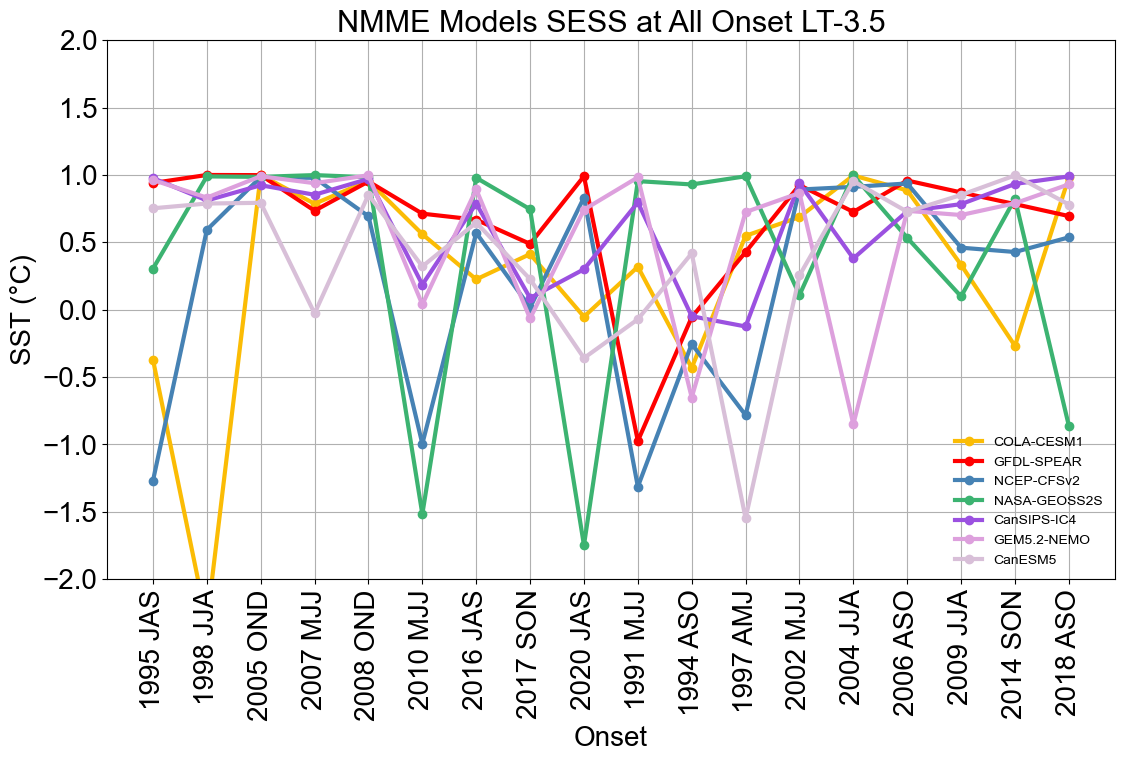

In [247]:
 def multimodel_sess_visualizer_all(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

     
    plt.plot(cola_all_onset_dfs[f'lead{lead}']['ONSET'], cola_all_onset_dfs[f'lead{lead}']['SESS'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_all_onset_dfs[f'lead{lead}']['ONSET'], gfdl_all_onset_dfs[f'lead{lead}']['SESS'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_all_onset_dfs[f'lead{lead}']['ONSET'], ncep_all_onset_dfs[f'lead{lead}']['SESS'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_all_onset_dfs[f'lead{lead}']['ONSET'], nasa_all_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_all_onset_dfs[f'lead{lead}']['ONSET'], canada_all_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(nemo_all_onset_dfs[f'lead{lead}']['ONSET'], nemo_all_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    plt.plot(canesm_all_onset_dfs[f'lead{lead}']['ONSET'], canesm_all_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5')
    
    #Customize the plot
    plt.title(f'NMME Models SESS at All Onset LT-{lead-0.5}',size = 22)
    plt.xlabel('Onset', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20, rotation='vertical')
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=-2, ymax=2)
    plt.savefig(f'../Plots/SESS/NMME_all_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
multimodel_sess_visualizer_all(4)

#separate Cold / Warm for each one... 



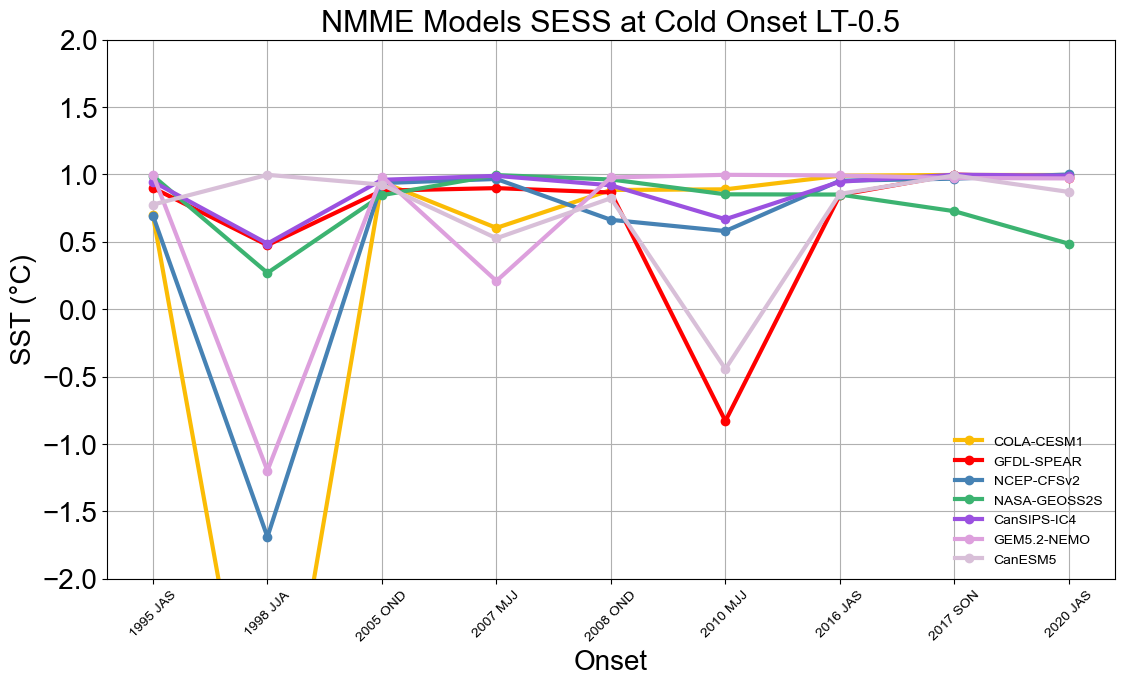

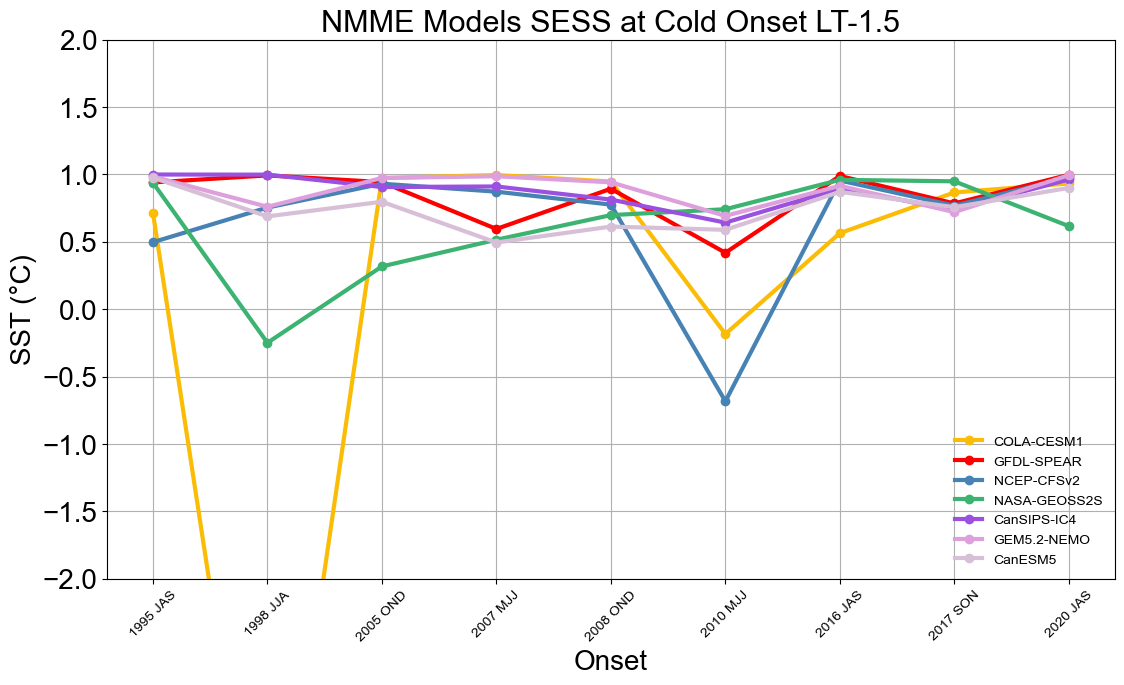

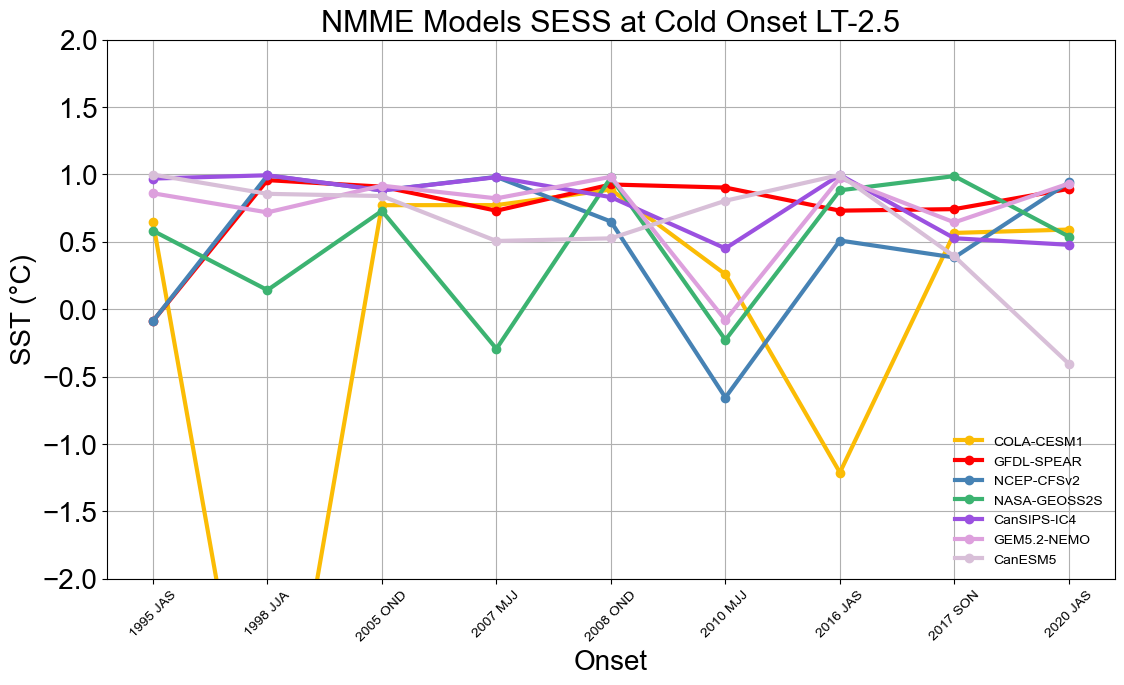

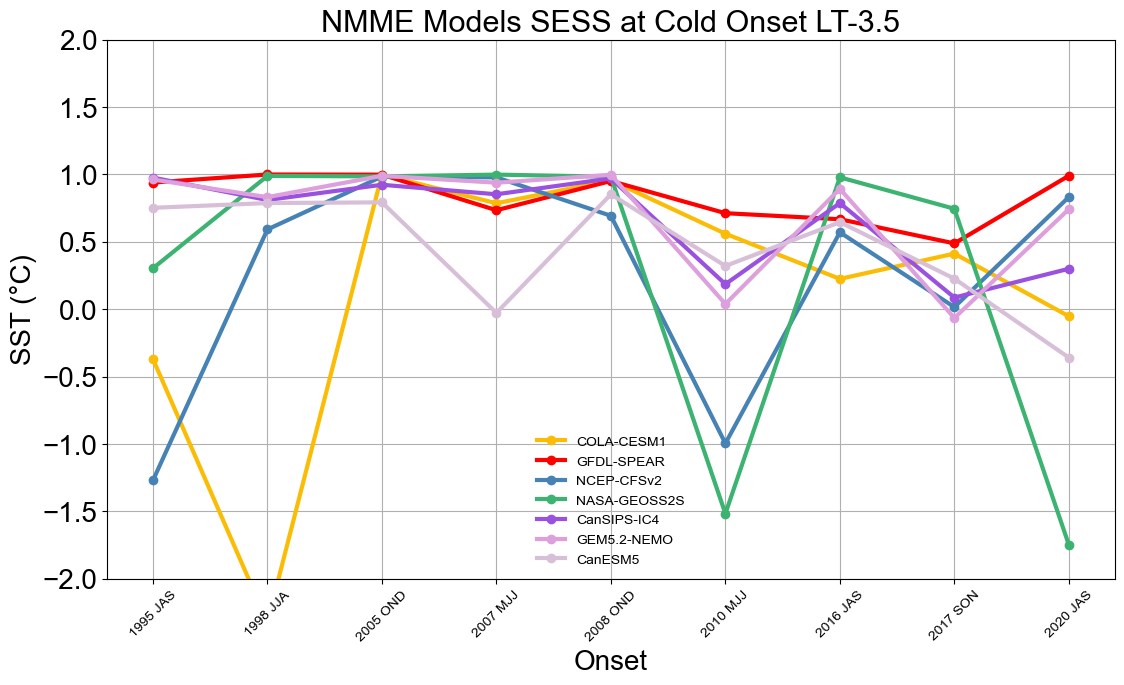

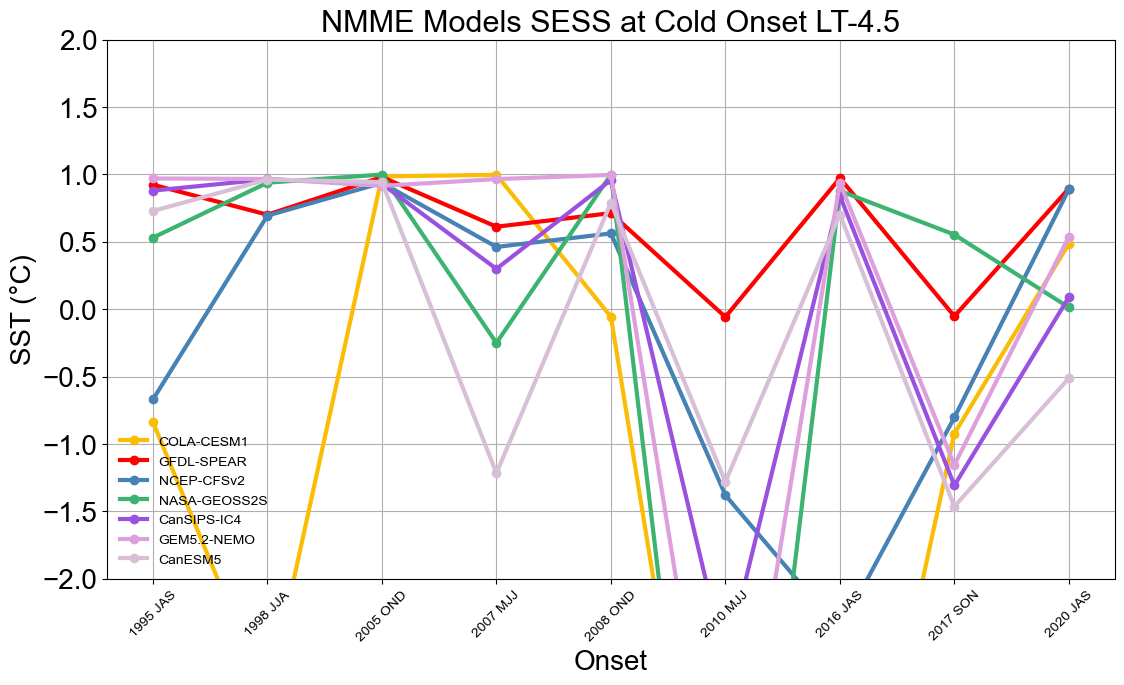

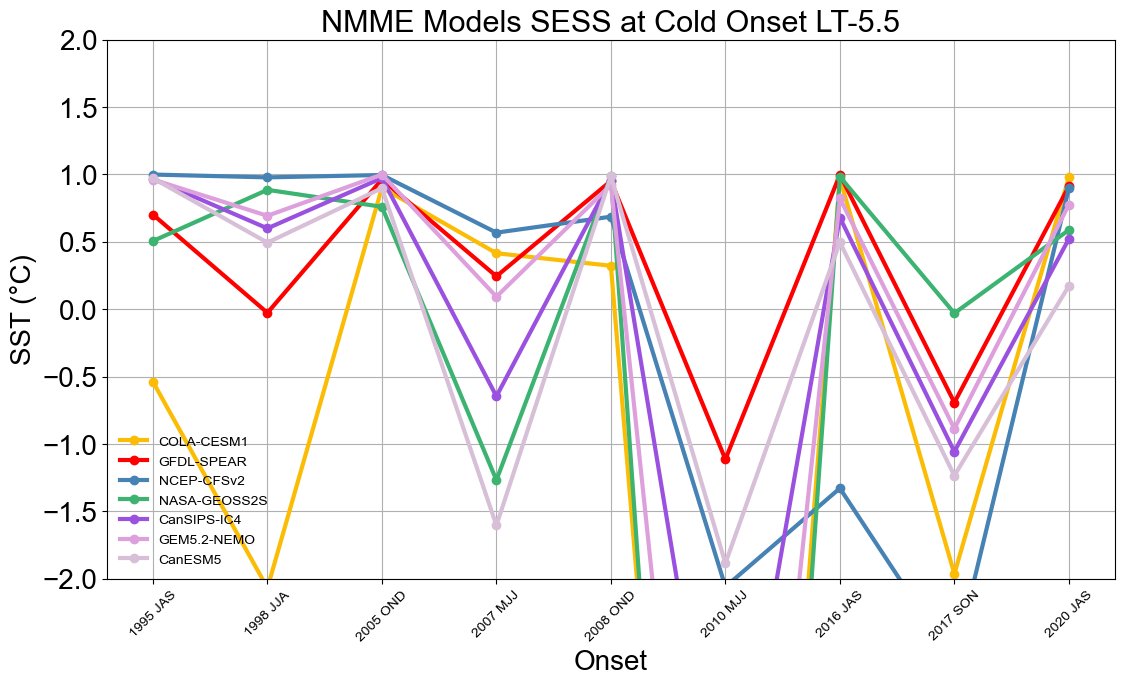

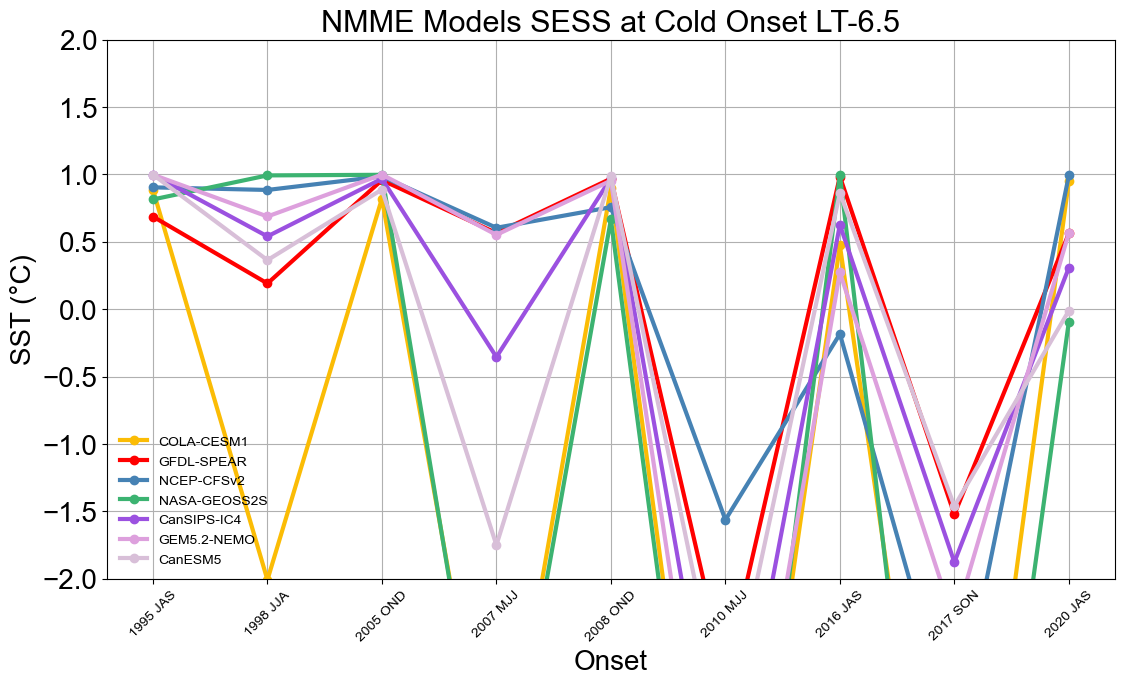

In [248]:
 def multimodel_sess_visualizer_cold(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

     
    plt.plot(cola_cold_onset_dfs[f'lead{lead}']['ONSET'], cola_cold_onset_dfs[f'lead{lead}']['SESS'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_cold_onset_dfs[f'lead{lead}']['ONSET'], gfdl_cold_onset_dfs[f'lead{lead}']['SESS'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_cold_onset_dfs[f'lead{lead}']['ONSET'], ncep_cold_onset_dfs[f'lead{lead}']['SESS'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_cold_onset_dfs[f'lead{lead}']['ONSET'], nasa_cold_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_cold_onset_dfs[f'lead{lead}']['ONSET'], canada_cold_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(nemo_cold_onset_dfs[f'lead{lead}']['ONSET'], nemo_cold_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    plt.plot(canesm_cold_onset_dfs[f'lead{lead}']['ONSET'], canesm_cold_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5')
    
    #Customize the plot
    plt.title(f'NMME Models SESS at Cold Onset LT-{lead-0.5}',size = 22)
    plt.xlabel('Onset', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 10, rotation=45)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=-2, ymax=2)
    plt.savefig(f'../Plots/SESS/NMME_cold_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

leads = [1,2,3,4,5,6,7]
for lead in leads:
    multimodel_sess_visualizer_cold(lead)

 



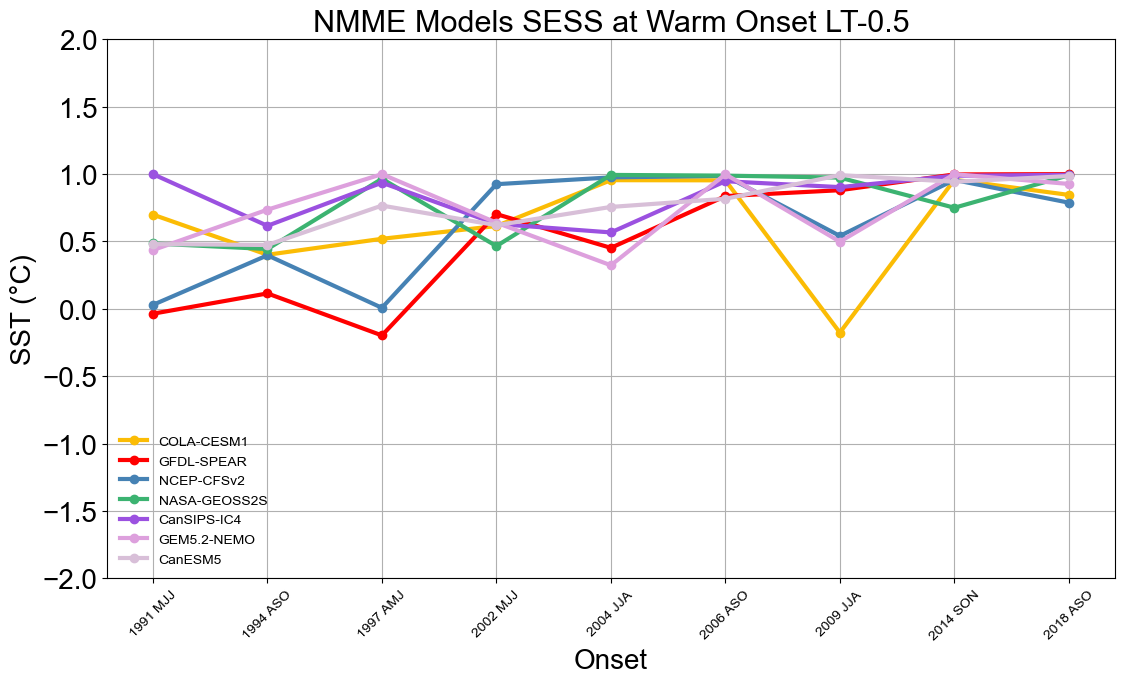

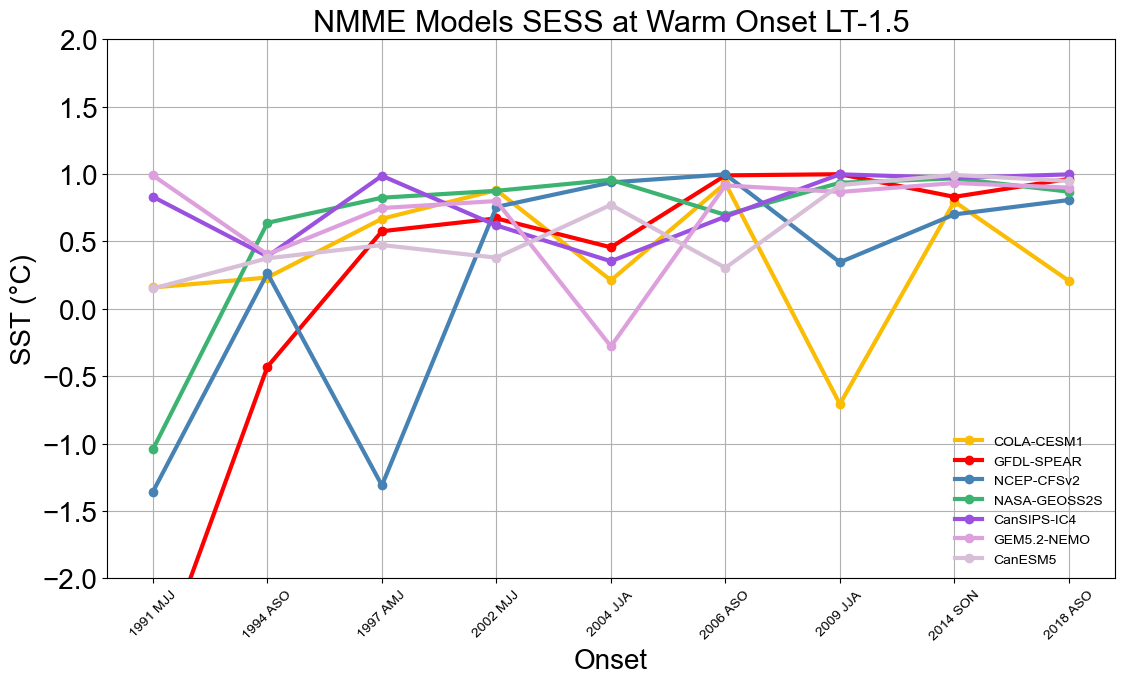

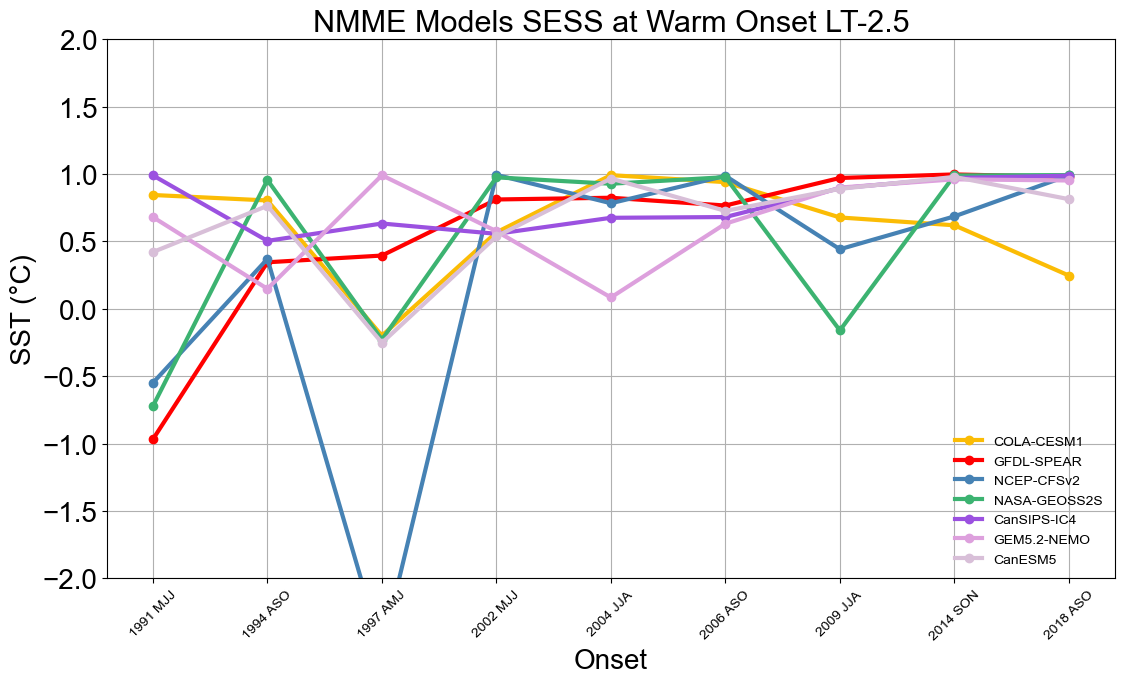

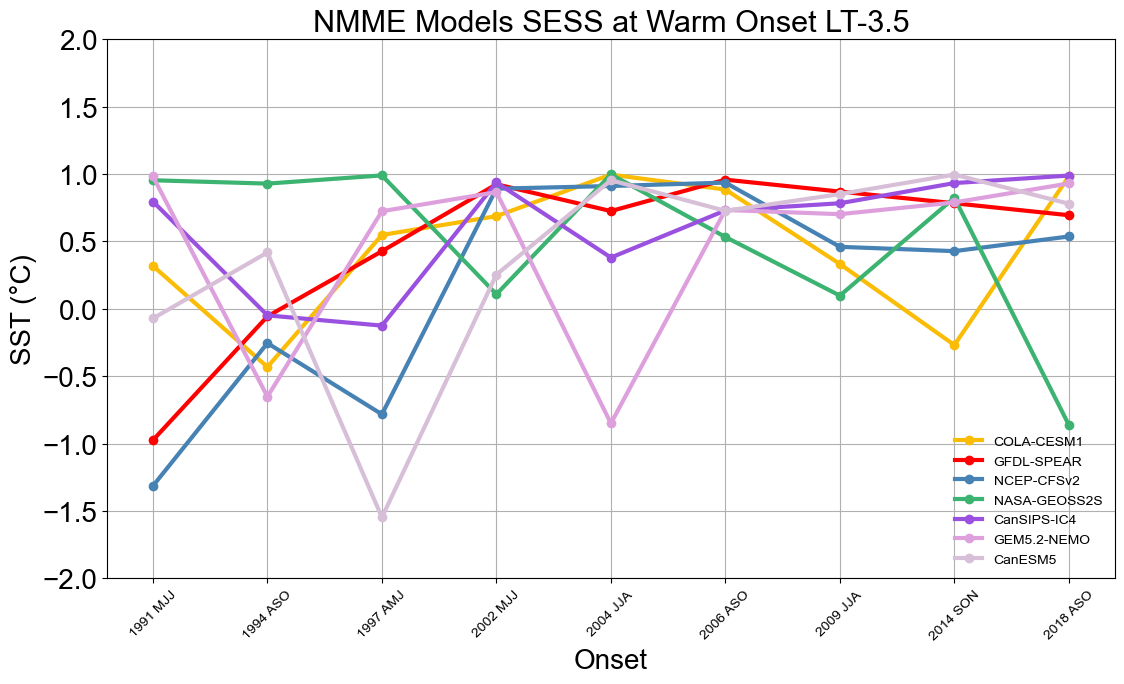

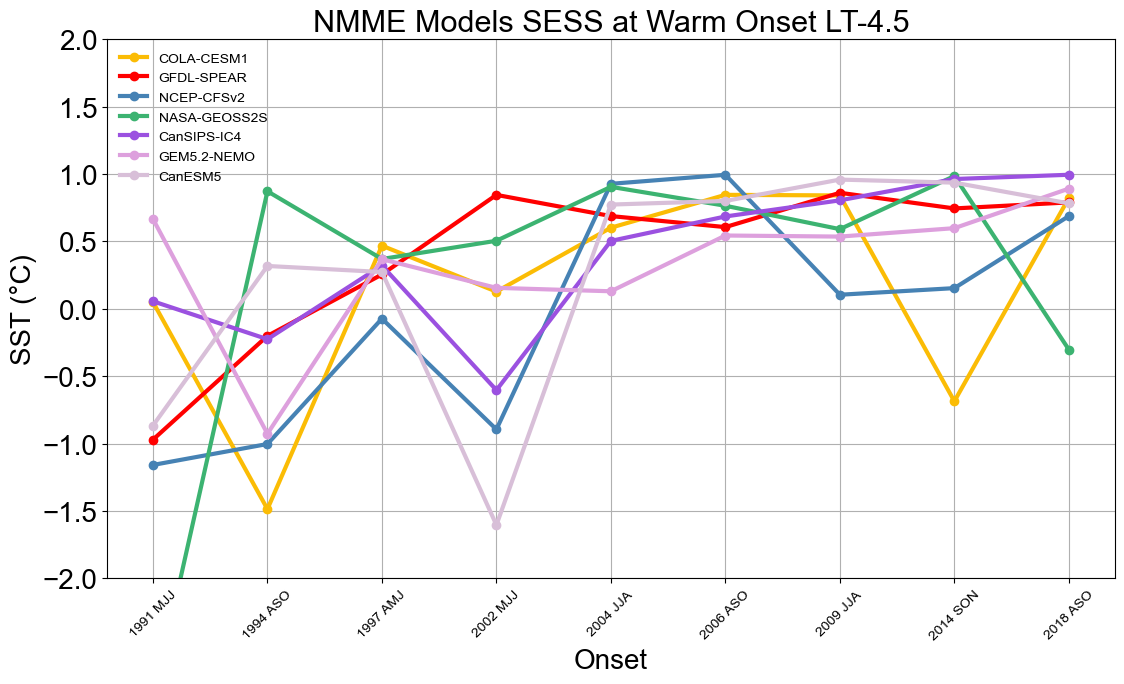

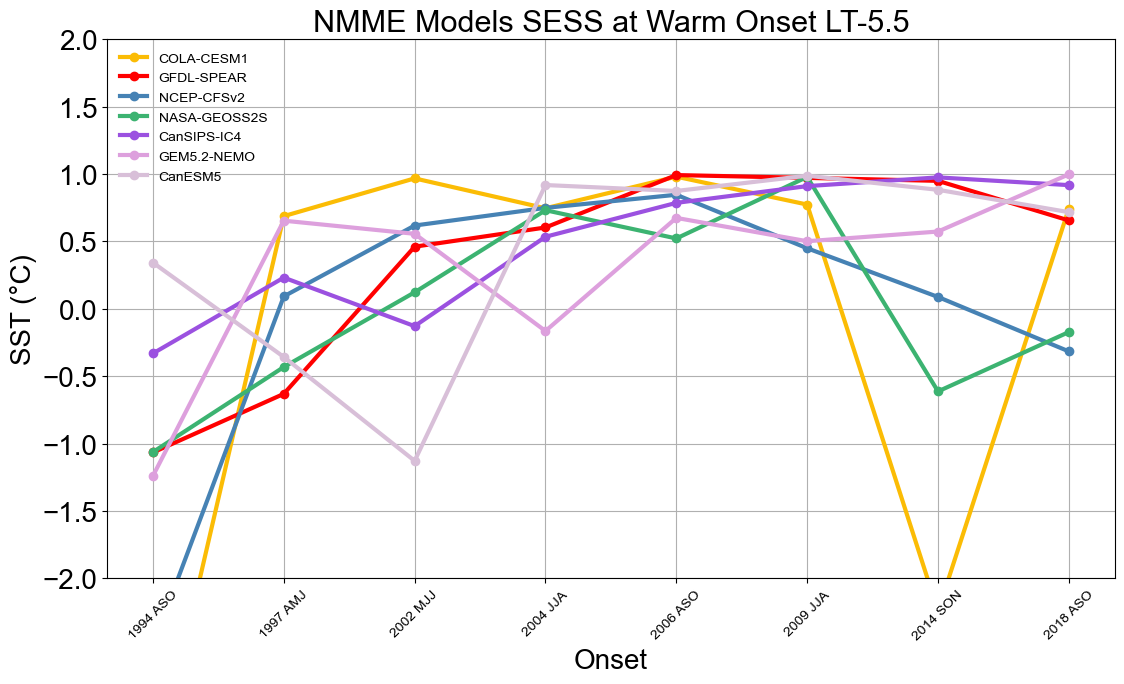

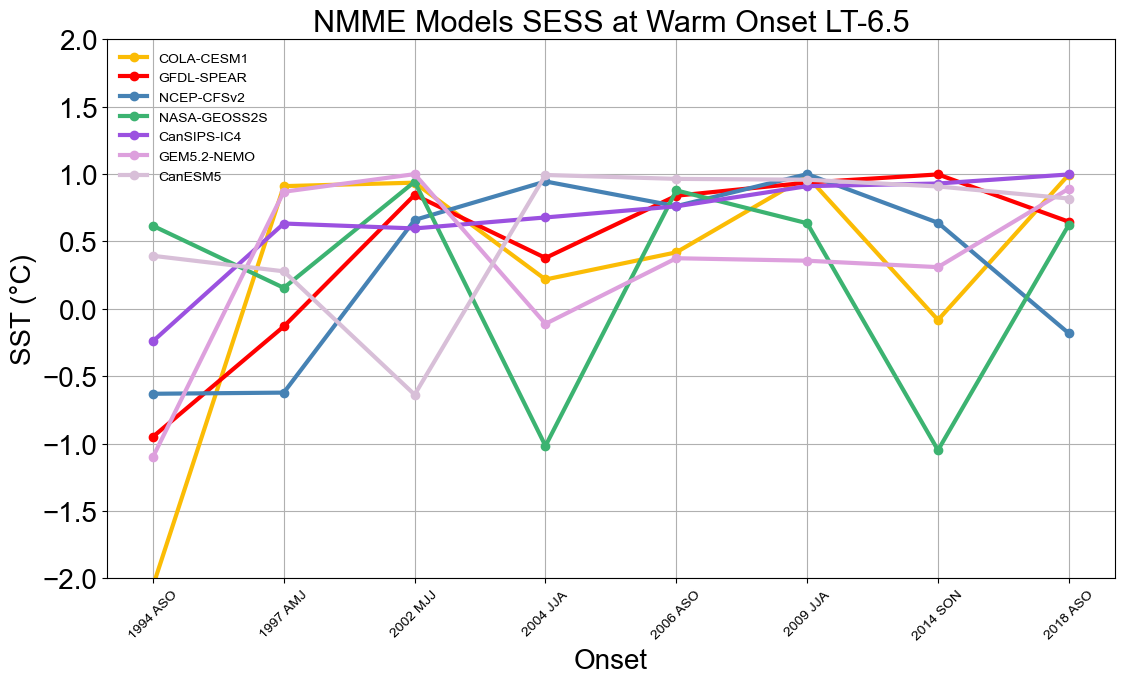

In [249]:
 def multimodel_sess_visualizer_warm(lead):
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 7))

     
    plt.plot(cola_warm_onset_dfs[f'lead{lead}']['ONSET'], cola_warm_onset_dfs[f'lead{lead}']['SESS'], marker='o', markersize=6, linewidth=3, linestyle='-', color='#FBBC05' ,label = 'COLA-CESM1')
    plt.plot(gfdl_warm_onset_dfs[f'lead{lead}']['ONSET'], gfdl_warm_onset_dfs[f'lead{lead}']['SESS'], marker='o', markersize=6, linewidth=3, linestyle='-', color='red', label = 'GFDL-SPEAR')
    plt.plot(ncep_warm_onset_dfs[f'lead{lead}']['ONSET'], ncep_warm_onset_dfs[f'lead{lead}']['SESS'], marker='o', markersize=6, linewidth=3, linestyle='-', color='steelblue' ,label = 'NCEP-CFSv2')
    plt.plot(nasa_warm_onset_dfs[f'lead{lead}']['ONSET'], nasa_warm_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3,linestyle='-', color='mediumseagreen' ,label = 'NASA-GEOSS2S')
    plt.plot(canada_warm_onset_dfs[f'lead{lead}']['ONSET'], canada_warm_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3,linestyle='-', color='#9B51E0' ,label = 'CanSIPS-IC4')
    plt.plot(nemo_warm_onset_dfs[f'lead{lead}']['ONSET'], nemo_warm_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='plum' ,label = 'GEM5.2-NEMO')
    plt.plot(canesm_warm_onset_dfs[f'lead{lead}']['ONSET'], canesm_warm_onset_dfs[f'lead{lead}']['SESS'], marker='o',markersize=6, linewidth=3, linestyle='-', color='thistle' ,label = 'CanESM5')
    
    #Customize the plot
    plt.title(f'NMME Models SESS at Warm Onset LT-{lead-0.5}',size = 22)
    plt.xlabel('Onset', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 10, rotation=45)
    plt.yticks(size = 20)
    plt.grid(True)
    plt.legend(frameon=False)
    plt.ylim(ymin=-2, ymax=2)
    plt.savefig(f'../Plots/SESS/NMME_warm_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()

leads = [1,2,3,4,5,6,7]
for lead in leads:
    multimodel_sess_visualizer_warm(lead)

#separate Cold / Warm for each one... 



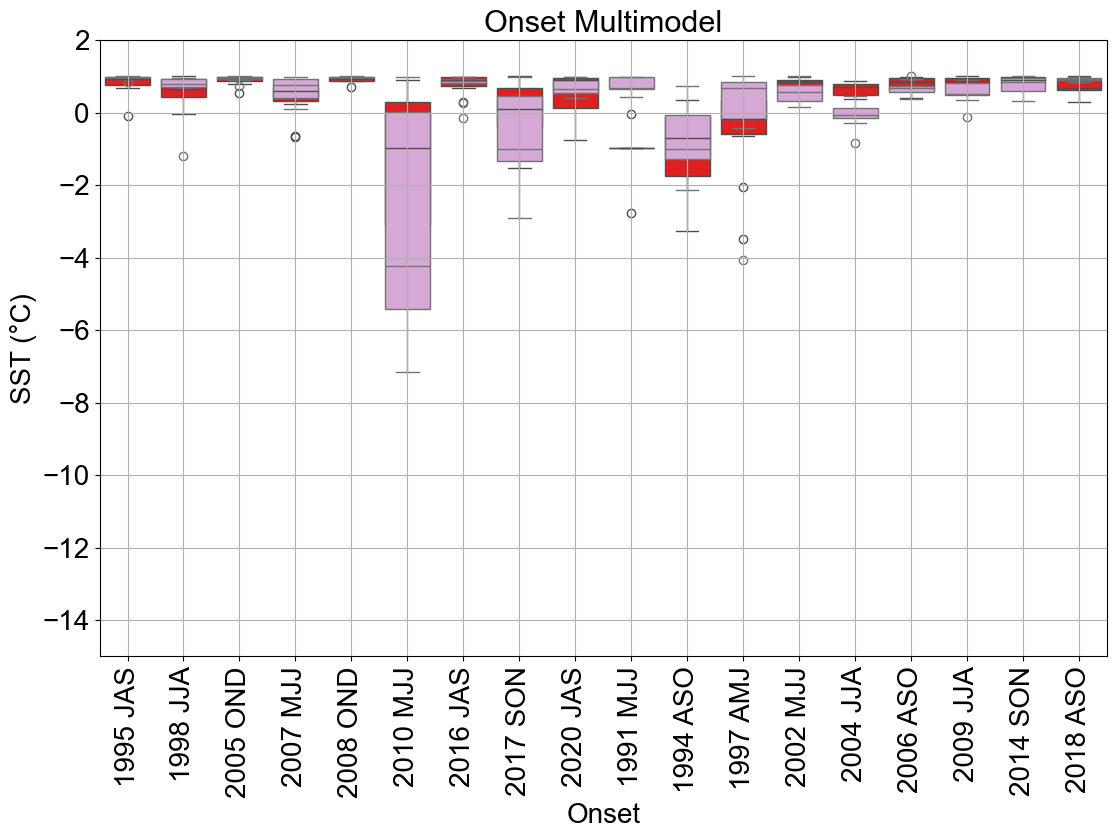

In [250]:
def multimodel_sess_visualizer():
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Arial']
    plt.figure(figsize=(13, 8))
    
    sns.boxplot(x='ONSET', y='SESS', data=gfdl_all_onset, color = 'red', zorder=1)
    #sns.boxplot(x='ONSET', y='SESS', data=cola_all_onset, color = '#FBBC05', zorder=1)
    #sns.boxplot(x='ONSET', y='SESS', data=ncep_all_onset, color = 'steelblue', zorder=1)
    #sns.boxplot(x='ONSET', y='SESS', data=nasa_all_onset, color = 'mediumseagreen', zorder=1)
    #sns.boxplot(x='ONSET', y='SESS', data=canada_all_onset, color = '#9B51E0', zorder=1)
    sns.boxplot(x='ONSET', y='SESS', data=nemo_all_onset, color = 'plum', zorder=1)
    #sns.boxplot(x='ONSET', y='SESS', data=canesm_all_onset, color = 'thistle', zorder=1)


    
    #Customize the plot
    plt.title(f'Onset Multimodel',size = 22)
    plt.xlabel('Onset', size = 20)
    plt.ylabel('SST (°C)', size = 20)
    plt.xticks(size = 20, rotation='vertical')
    plt.yticks(size = 20)
    plt.grid(True)
    #plt.legend(frameon=False)
    plt.ylim(ymin=-15, ymax=2)
    #plt.savefig(f'../Plots/Var/seasonal_var_NINO{region}_lead{lead-0.5}.png', format='png')
    # Show the plot
    plt.show()
multimodel_sess_visualizer()

In [251]:
cold_onset_order = ['2007 MJJ', '2010 MJJ', '1998 JJA', '1995 JAS', '2016 JAS', '2020 JAS', '2017 SON', '2005 OND','2008 OND']
warm_onset_order = ['1997 AMJ', '1991 MJJ', '2002 MJJ', '2004 JJA', '2009 JJA', '1994 ASO', '2006 ASO', '2018 ASO', '2014 SON']
gfdl_warm_mesh = gfdl_warm_onset.pivot(index='L', columns='TAR', values='SESS')
gfdl_warm_mesh = gfdl_warm_mesh.fillna(np.nan)
gfdl_cold_mesh = gfdl_cold_onset.pivot(index='L', columns='TAR', values='SESS')
gfdl_cold_mesh = gfdl_cold_mesh.fillna(np.nan)
gfdl_all_mesh = gfdl_all_onset.pivot(index='L', columns='TAR', values='SESS')
gfdl_all_mesh = gfdl_all_mesh.fillna(np.nan)


cola_warm_mesh = cola_warm_onset.pivot(index='L', columns='TAR', values='SESS')
cola_warm_mesh = cola_warm_mesh.fillna(np.nan)
cola_cold_mesh = cola_cold_onset.pivot(index='L', columns='TAR', values='SESS')
cola_cold_mesh = cola_cold_mesh.fillna(np.nan)
cola_all_mesh = cola_all_onset.pivot(index='L', columns='TAR', values='SESS')
cola_all_mesh = cola_all_mesh.fillna(np.nan)


ncep_warm_mesh = ncep_warm_onset.pivot(index='L', columns='TAR', values='SESS')
ncep_warm_mesh = ncep_warm_mesh.fillna(np.nan)
ncep_cold_mesh = ncep_cold_onset.pivot(index='L', columns='TAR', values='SESS')
ncep_cold_mesh = ncep_cold_mesh.fillna(np.nan)
ncep_all_mesh = ncep_all_onset.pivot(index='L', columns='TAR', values='SESS')
ncep_all_mesh = ncep_all_mesh.fillna(np.nan)


nasa_warm_mesh = nasa_warm_onset.pivot(index='L', columns='TAR', values='SESS')
nasa_warm_mesh = nasa_warm_mesh.fillna(np.nan)
nasa_cold_mesh = nasa_cold_onset.pivot(index='L', columns='TAR', values='SESS')
nasa_cold_mesh = nasa_cold_mesh.fillna(np.nan)
nasa_all_mesh = nasa_all_onset.pivot(index='L', columns='TAR', values='SESS')
nasa_all_mesh = nasa_all_mesh.fillna(np.nan)


canada_warm_mesh = canada_warm_onset.pivot(index='L', columns='TAR', values='SESS')
canada_warm_mesh = canada_warm_mesh.fillna(np.nan)
canada_cold_mesh = canada_cold_onset.pivot(index='L', columns='TAR', values='SESS')
canada_cold_mesh = canada_cold_mesh.fillna(np.nan)
canada_all_mesh = canada_all_onset.pivot(index='L', columns='TAR', values='SESS')
canada_all_mesh = canada_all_mesh.fillna(np.nan)


canesm_warm_mesh = canesm_warm_onset.pivot(index='L', columns='TAR', values='SESS')
canesm_warm_mesh = canesm_warm_mesh.fillna(np.nan)
canesm_cold_mesh = canesm_cold_onset.pivot(index='L', columns='TAR', values='SESS')
canesm_cold_mesh = canesm_cold_mesh.fillna(np.nan)
canesm_all_mesh = canesm_all_onset.pivot(index='L', columns='TAR', values='SESS')
canesm_all_mesh = canesm_all_mesh.fillna(np.nan)


nemo_warm_mesh = nemo_warm_onset.pivot(index='L', columns='TAR', values='SESS')
nemo_warm_mesh = nemo_warm_mesh.fillna(np.nan)
nemo_cold_mesh = nemo_cold_onset.pivot(index='L', columns='TAR', values='SESS')
nemo_cold_mesh = nemo_cold_mesh.fillna(np.nan)
nemo_all_mesh = nemo_all_onset.pivot(index='L', columns='TAR', values='SESS')
nemo_all_mesh = nemo_all_mesh.fillna(np.nan)


nemo_cold_mesh

TAR   1995-08-15  1998-07-15  2005-11-15  2007-06-15  2008-11-15  2010-06-15  \
L                                                                              
1.5     0.999862   -1.197431    0.985114    0.209559    0.978152    0.997616   
2.5     0.984962    0.760438    0.974170    0.986851    0.941757    0.692902   
3.5     0.860640    0.718803    0.917038    0.822867    0.982655   -0.080668   
4.5     0.962867    0.831957    0.990524    0.939011    0.998169    0.038817   
5.5     0.970441    0.967095    0.915510    0.965823    0.997083   -4.269997   
6.5     0.962625    0.693475    0.999951    0.092939    0.923201   -7.160728   
7.5     0.998662    0.688367    0.999539    0.552381    0.954545   -4.663823   
8.5     0.999977    0.949618    0.953883    0.678512    0.999860   -4.172221   
9.5     0.998663    0.808256    0.924421    0.349477    0.969736   -5.679712   
10.5    0.940543    0.967784    0.741594    0.933312    0.945300   -5.845615   

TAR   2016-08-15  2017-10-15  2020-08-15  
L                                         
1.5     0.993025    0.974097    0.970745  
2.5     0.915784    0.720892    0.995170  
3.5     0.973713    0.644620    0.932786  
4.5     0.893450   -0.065112    0.742776  
5.5     0.937528   -1.156032    0.538996  
6.5     0.822676   -0.886413    0.776111  
7.5     0.273352   -2.326092    0.567285  
8.5    -0.145036   -2.894941    0.556071  
9.5     0.855720   -1.381469    0.398730  
10.5    0.873812   -1.117871    0.547476

In [252]:
gfdl_warm_mesh = gfdl_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
gfdl_warm_mesh = gfdl_warm_mesh.fillna(np.nan)
gfdl_cold_mesh = gfdl_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
gfdl_cold_mesh = gfdl_cold_mesh.fillna(np.nan)
gfdl_all_mesh = gfdl_all_onset.pivot(index='L', columns='ONSET', values='SESS')
gfdl_all_mesh = gfdl_all_mesh.fillna(np.nan)
cola_warm_mesh = cola_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
cola_warm_mesh = cola_warm_mesh.fillna(np.nan)
cola_cold_mesh = cola_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
cola_cold_mesh = cola_cold_mesh.fillna(np.nan)
cola_all_mesh = cola_all_onset.pivot(index='L', columns='ONSET', values='SESS')
cola_all_mesh = cola_all_mesh.fillna(np.nan)
ncep_warm_mesh = ncep_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
ncep_warm_mesh = ncep_warm_mesh.fillna(np.nan)
ncep_cold_mesh = ncep_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
ncep_cold_mesh = ncep_cold_mesh.fillna(np.nan)
ncep_all_mesh = ncep_all_onset.pivot(index='L', columns='ONSET', values='SESS')
ncep_all_mesh = ncep_all_mesh.fillna(np.nan)
#add NaN for ncep
new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_cold_mesh.columns)
ncep_cold_mesh = pd.concat([ncep_cold_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_warm_mesh.columns)
ncep_warm_mesh = pd.concat([ncep_warm_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[9.5, 10.5], columns=ncep_all_mesh.columns)
ncep_all_mesh = pd.concat([ncep_all_mesh, new_rows])

nasa_warm_mesh = nasa_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
nasa_warm_mesh = nasa_warm_mesh.fillna(np.nan)
nasa_cold_mesh = nasa_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
nasa_cold_mesh = nasa_cold_mesh.fillna(np.nan)
nasa_all_mesh = nasa_all_onset.pivot(index='L', columns='ONSET', values='SESS')
nasa_all_mesh = nasa_all_mesh.fillna(np.nan)
#add NaN for nasa
new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_cold_mesh.columns)
nasa_cold_mesh = pd.concat([nasa_cold_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_all_mesh.columns)
nasa_all_mesh = pd.concat([nasa_all_mesh, new_rows])

new_rows = pd.DataFrame(np.nan, index=[8.5, 9.5, 10.5], columns=nasa_warm_mesh.columns)
nasa_warm_mesh = pd.concat([nasa_warm_mesh, new_rows])
nasa_cold_mesh = nasa_cold_mesh.reindex(columns=cold_onset_order)
nasa_warm_mesh = nasa_warm_mesh.reindex(columns=warm_onset_order)

canada_warm_mesh = canada_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
canada_warm_mesh = canada_warm_mesh.fillna(np.nan)
canada_cold_mesh = canada_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
canada_cold_mesh = canada_cold_mesh.fillna(np.nan)
canada_all_mesh = canada_all_onset.pivot(index='L', columns='ONSET', values='SESS')
canada_all_mesh = canada_all_mesh.fillna(np.nan)
canada_cold_mesh = canada_cold_mesh.reindex(columns=cold_onset_order)
canada_warm_mesh = canada_warm_mesh.reindex(columns=warm_onset_order)
canesm_warm_mesh = canesm_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
canesm_warm_mesh = canesm_warm_mesh.fillna(np.nan)
canesm_cold_mesh = canesm_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
canesm_cold_mesh = canesm_cold_mesh.fillna(np.nan)
canesm_all_mesh = canesm_all_onset.pivot(index='L', columns='ONSET', values='SESS')
canesm_all_mesh = canesm_all_mesh.fillna(np.nan)
canesm_cold_mesh = canesm_cold_mesh.reindex(columns=cold_onset_order)
canesm_warm_mesh = canesm_warm_mesh.reindex(columns=warm_onset_order)
nemo_warm_mesh = nemo_warm_onset.pivot(index='L', columns='ONSET', values='SESS')
nemo_warm_mesh = nemo_warm_mesh.fillna(np.nan)
nemo_cold_mesh = nemo_cold_onset.pivot(index='L', columns='ONSET', values='SESS')
nemo_cold_mesh = nemo_cold_mesh.fillna(np.nan)
nemo_all_mesh = nemo_all_onset.pivot(index='L', columns='ONSET', values='SESS')
nemo_all_mesh = nemo_all_mesh.fillna(np.nan)
nemo_cold_mesh = nemo_cold_mesh.reindex(columns=cold_onset_order)
nemo_warm_mesh = nemo_warm_mesh.reindex(columns=warm_onset_order)
ncep_cold_mesh = ncep_cold_mesh.reindex(columns=cold_onset_order)
ncep_warm_mesh = ncep_warm_mesh.reindex(columns=warm_onset_order)
cola_cold_mesh = cola_cold_mesh.reindex(columns=cold_onset_order)
cola_warm_mesh = cola_warm_mesh.reindex(columns=warm_onset_order)
gfdl_cold_mesh = gfdl_cold_mesh.reindex(columns=cold_onset_order)
gfdl_warm_mesh = gfdl_warm_mesh.reindex(columns=warm_onset_order)
ncep_cold_mesh

ONSET  2007 MJJ  2010 MJJ  1998 JJA  1995 JAS  2016 JAS  2020 JAS  2017 SON  \
1.5    0.966778  0.580117 -1.689490  0.694372  0.953761  0.999966  0.969071   
2.5    0.872484 -0.683252  0.754647  0.497824  0.955259  0.978293  0.768600   
3.5    0.982079 -0.655037  0.992835 -0.087904  0.509936  0.941754  0.384250   
4.5    0.978589 -0.995550  0.592339 -1.270137  0.570671  0.832682  0.015873   
5.5    0.462387 -1.379938  0.694800 -0.669494 -2.380999  0.890921 -0.802819   
6.5    0.568513 -2.059720  0.978617  0.999623 -1.328570  0.897048 -2.619053   
7.5    0.604611 -1.562640  0.885310  0.904583 -0.183488  0.992760 -3.180179   
8.5    0.386084 -1.321821  0.944623  0.999999  0.209309  0.346733 -2.085487   
9.5         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
10.5        NaN       NaN       NaN       NaN       NaN       NaN       NaN   

ONSET  2005 OND  2008 OND  
1.5    0.936282  0.663610  
2.5    0.931659  0.776362  
3.5    0.882015  0.650910  
4.5    0.984664  0.693468  
5.5    0.937558  0.562622  
6.5    0.996292  0.686949  
7.5    0.986281  0.757475  
8.5    0.999729  0.927784  
9.5         NaN       NaN  
10.5        NaN       NaN

In [253]:

#separate warm and cold, implement discrete colors so that... value between 0-1, you can even just color -1-1, then beyond -1 is meaningless.... 
#Use more discrete colors to immediately tell apart 1.. .75 ... 0.5 ... 0.25... -0.25, -0.5, ... -1 and beyond
"""
# Extract the x and y values
x = nasa_warm_mesh.columns.values  # Lead times (L)
y = nasa_warm_mesh.index.values    # Target times (TAR)
Z = nasa_warm_mesh.values

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(13, 7))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='viridis', shading='auto',vmin=-1, vmax=1)

# Add color bar
plt.colorbar(c, label='SESS')

# Add labels and title
plt.ylabel('Lead Time (L)')
plt.xlabel('Target Time (TAR)')
plt.title('Pseudocolor plot of SESS with respect to Lead Time and Target Time, NASA Warm Events')
plt.xticks(ticks=x, rotation=45)

# Show plot
plt.show()
"""


"\n# Extract the x and y values\nx = nasa_warm_mesh.columns.values  # Lead times (L)\ny = nasa_warm_mesh.index.values    # Target times (TAR)\nZ = nasa_warm_mesh.values\n\n# Create the meshgrid\nx_mesh, y_mesh = np.meshgrid(x, y)\n\n# Plot using pcolormesh\nplt.rcParams['font.family'] = 'sans-serif'\nplt.rcParams['font.sans-serif'] = ['Arial']\nplt.figure(figsize=(13, 7))\nc = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='viridis', shading='auto',vmin=-1, vmax=1)\n\n# Add color bar\nplt.colorbar(c, label='SESS')\n\n# Add labels and title\nplt.ylabel('Lead Time (L)')\nplt.xlabel('Target Time (TAR)')\nplt.title('Pseudocolor plot of SESS with respect to Lead Time and Target Time, NASA Warm Events')\nplt.xticks(ticks=x, rotation=45)\n\n# Show plot\nplt.show()\n"

In [254]:
"""
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba

# Extract the x and y values
x = np.arange(len(ncep_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(ncep_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_cold_mesh.values

boundaries = np.arange(-1, 1.25, 0.25)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(7, 7))
#plt.figure(figsize=(10, 13))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='coolwarm', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
plt.colorbar(c,label='SESS', boundaries=boundaries, ticks=boundaries, orientation = 'horizontal')
# Add labels and title
plt.ylabel('Lead Time', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(g) NCEP-CFSv2', size = 22)

# Adjust y-ticks to show original string labels
y_labels = ncep_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_cold_mesh.columns, rotation=90, size = 15)
def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('coolwarm')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')
plt.tight_layout()
#plt.savefig(f'../Plots/SESS/ncep_Cold_Onset_SESS.png', format='png')

plt.show()
"""

"\nfrom matplotlib.colors import BoundaryNorm, Normalize, to_rgba\n\n# Extract the x and y values\nx = np.arange(len(ncep_cold_mesh.columns))  # Numerical indices for Lead times (L)\ny = np.arange(len(ncep_cold_mesh.index))    # Numerical indices for Target times (TAR)\nZ = ncep_cold_mesh.values\n\nboundaries = np.arange(-1, 1.25, 0.25)  # Boundaries from -1 to 1 with interval of 0.25\nnorm = BoundaryNorm(boundaries, ncolors=256, clip=True)\n# Create the meshgrid\nx_mesh, y_mesh = np.meshgrid(x, y)\n\n# Plot using pcolormesh\nplt.rcParams['font.family'] = 'sans-serif'\nplt.rcParams['font.sans-serif'] = ['Arial']\nplt.figure(figsize=(7, 7))\n#plt.figure(figsize=(10, 13))\nc = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='coolwarm', norm=norm, shading='auto',edgecolors='black', linewidth=1)\n\n# Add color bar\nplt.colorbar(c,label='SESS', boundaries=boundaries, ticks=boundaries, orientation = 'horizontal')\n# Add labels and title\nplt.ylabel('Lead Time', size = 20)\nplt.xlabel('Target Season',

In [255]:
"""
# Extract the x and y values
x = np.arange(len(nemo_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nemo_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = nemo_warm_mesh.values

boundaries = np.arange(-1, 1.25, 0.25)  # Boundaries from -1 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=256, clip=True)
# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(6.5, 7))
#plt.figure(figsize=(6, 7))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='coolwarm', norm=norm, shading='auto',edgecolors='black', linewidth=1)

# Add color bar
#plt.colorbar(c, label='SESS',boundaries=boundaries, ticks=boundaries)

# Add labels and title
plt.ylabel('Lead Time', size = 20)
plt.xlabel('Target Season', size = 20)
plt.title('(c) GEM5.2-NEMO', size = 22)

# Adjust y-ticks to show original string labels
y_labels = nemo_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_warm_mesh.columns, rotation=90, size = 15)

for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        plt.text(j + 0.0, i - 0.25, f'{Z[i, j]:.2f}', ha='center', va='center', color='white', fontsize=10)
        
def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(plt.get_cmap('coolwarm')(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')
plt.tight_layout()
plt.savefig(f'../Plots/SESS/nemo_Warm_Onset_SESS.png', format='png')
plt.show()
"""

"\n# Extract the x and y values\nx = np.arange(len(nemo_warm_mesh.columns))  # Numerical indices for Lead times (L)\ny = np.arange(len(nemo_warm_mesh.index))    # Numerical indices for Target times (TAR)\nZ = nemo_warm_mesh.values\n\nboundaries = np.arange(-1, 1.25, 0.25)  # Boundaries from -1 to 1 with interval of 0.25\nnorm = BoundaryNorm(boundaries, ncolors=256, clip=True)\n# Create the meshgrid\nx_mesh, y_mesh = np.meshgrid(x, y)\n\n# Plot using pcolormesh\nplt.rcParams['font.family'] = 'sans-serif'\nplt.rcParams['font.sans-serif'] = ['Arial']\nplt.figure(figsize=(6.5, 7))\n#plt.figure(figsize=(6, 7))\nc = plt.pcolormesh(x_mesh, y_mesh, Z, cmap='coolwarm', norm=norm, shading='auto',edgecolors='black', linewidth=1)\n\n# Add color bar\n#plt.colorbar(c, label='SESS',boundaries=boundaries, ticks=boundaries)\n\n# Add labels and title\nplt.ylabel('Lead Time', size = 20)\nplt.xlabel('Target Season', size = 20)\nplt.title('(c) GEM5.2-NEMO', size = 22)\n\n# Adjust y-ticks to show original s

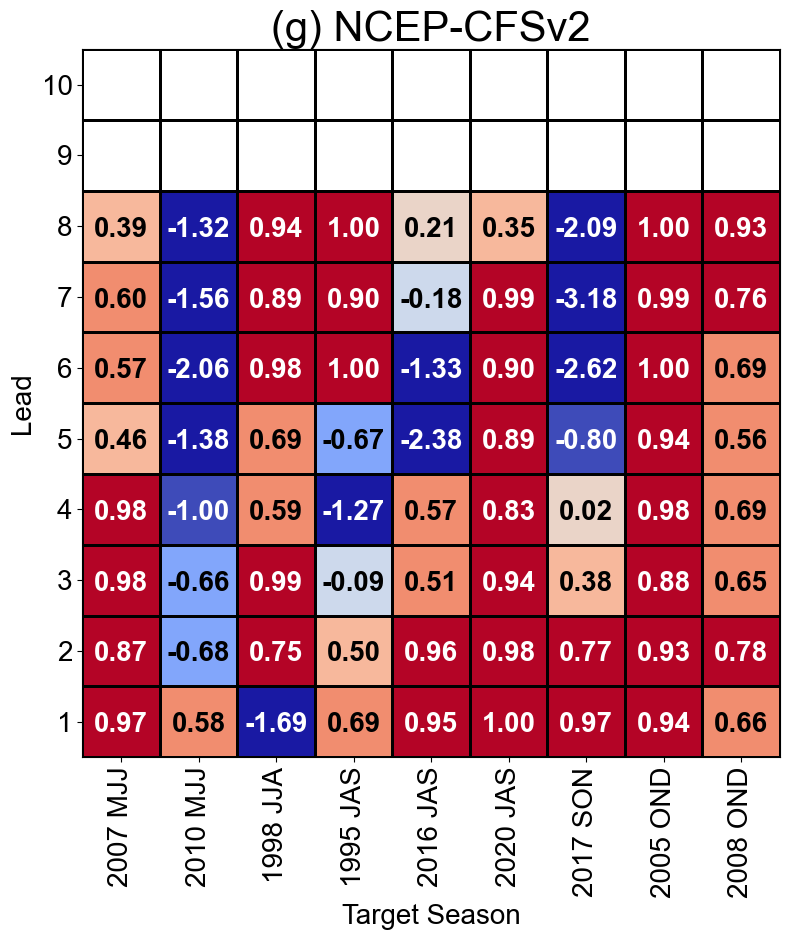

In [256]:


# Extract the x and y values
x = np.arange(len(ncep_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(ncep_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(g) NCEP-CFSv2', size=30)

# Adjust y-ticks to show original string labels
y_labels = ncep_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/ncep_Cold_Onset_SESS.svg', format='svg')

plt.show()


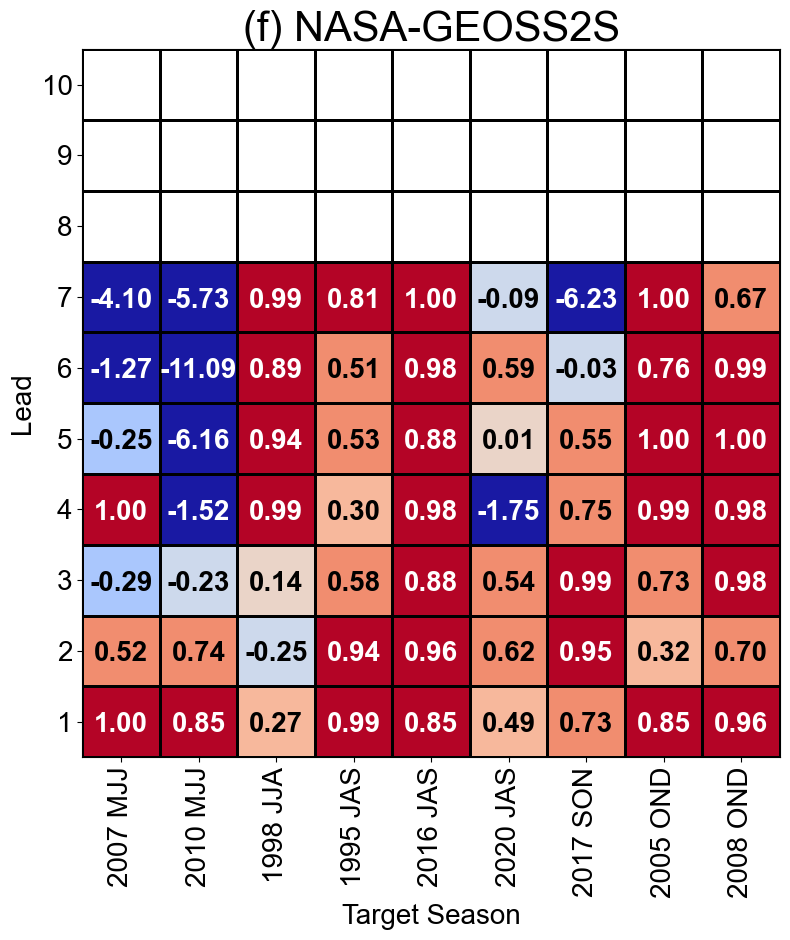

In [257]:
# nasa_cold 

# Extract the x and y values
x = np.arange(len(nasa_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nasa_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(f) NASA-GEOSS2S', size=30)

# Adjust y-ticks to show original string labels
y_labels = nasa_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/nasa_Cold_Onset_SESS.svg', format='svg')

plt.show()


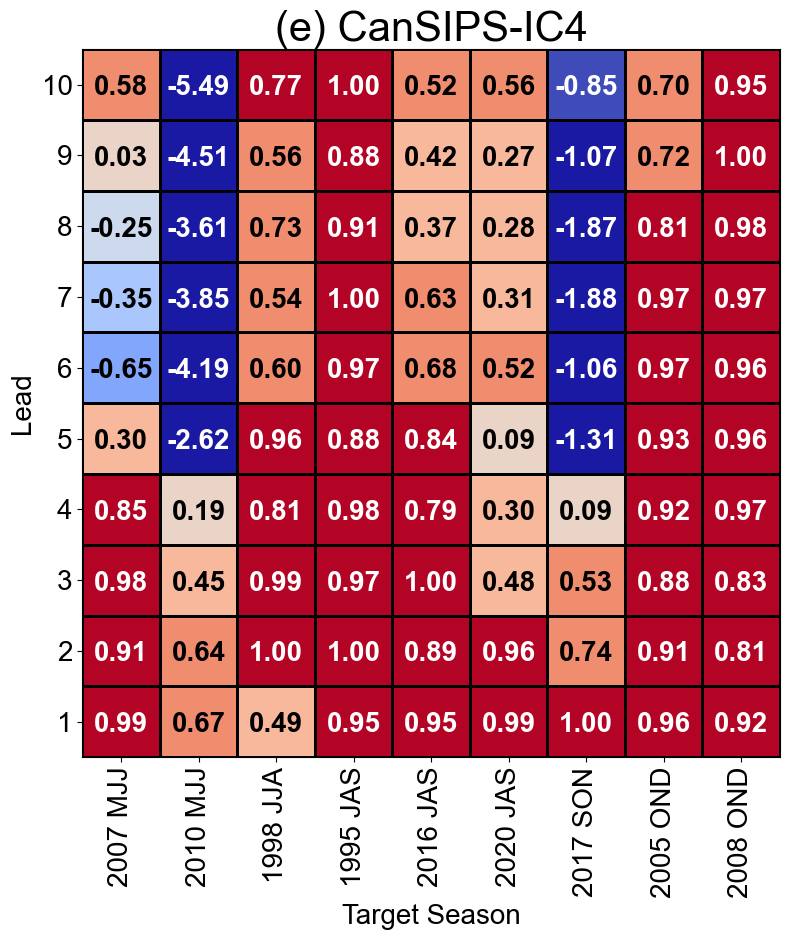

In [258]:
#canada_cold 

# Extract the x and y values
x = np.arange(len(canada_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canada_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = canada_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(e) CanSIPS-IC4', size=30)

# Adjust y-ticks to show original string labels
y_labels = canada_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/canada_Cold_Onset_SESS.svg', format='svg')

plt.show()


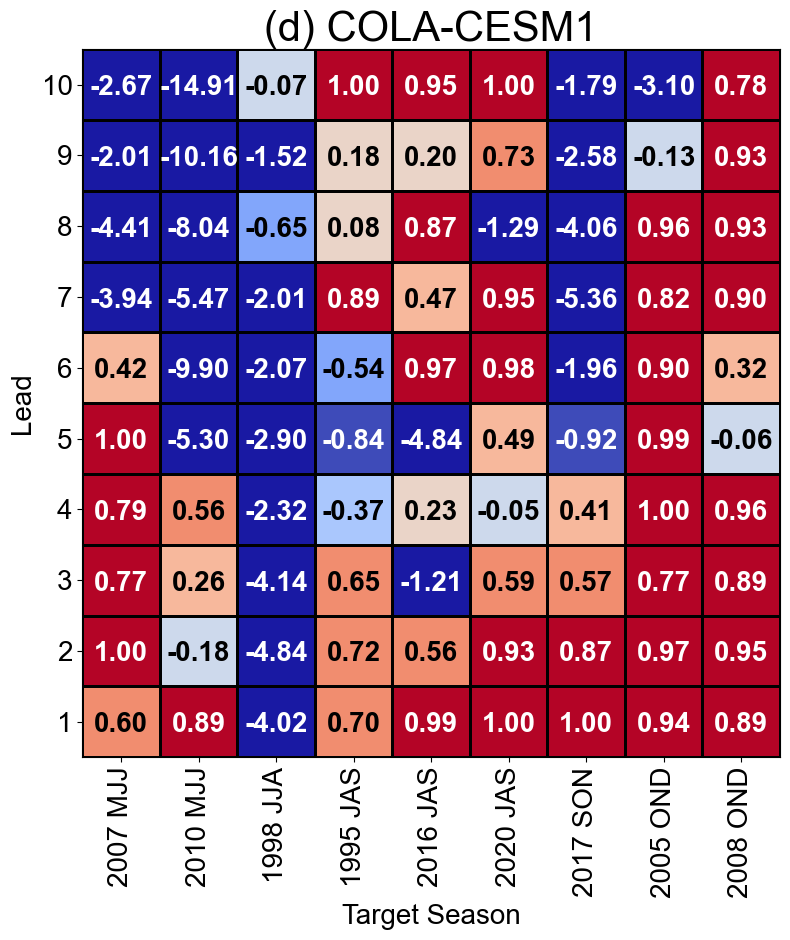

In [259]:
#cola_cold 

# Extract the x and y values
x = np.arange(len(cola_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(cola_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = cola_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(d) COLA-CESM1', size=30)

# Adjust y-ticks to show original string labels
y_labels = cola_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=cola_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/cola_Cold_Onset_SESS.svg', format='svg')

plt.show()


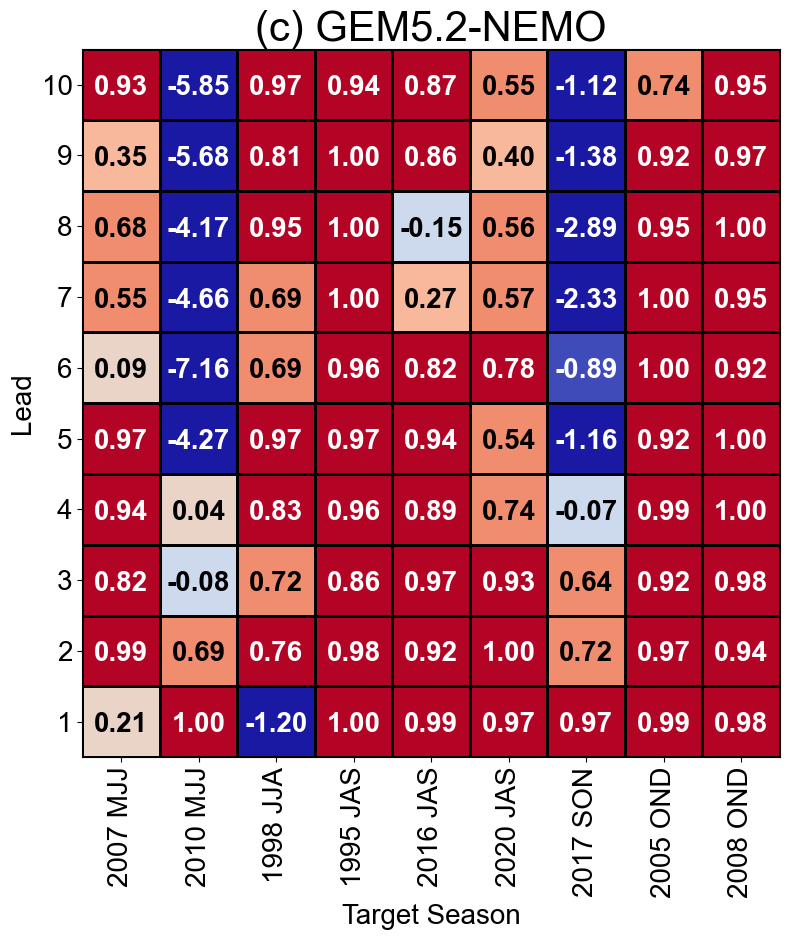

In [260]:
#nemo_cold 

# Extract the x and y values
x = np.arange(len(nemo_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nemo_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = nemo_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(c) GEM5.2-NEMO', size=30)

# Adjust y-ticks to show original string labels
y_labels = nemo_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/nemo_Cold_Onset_SESS.svg', format='svg')

plt.show()


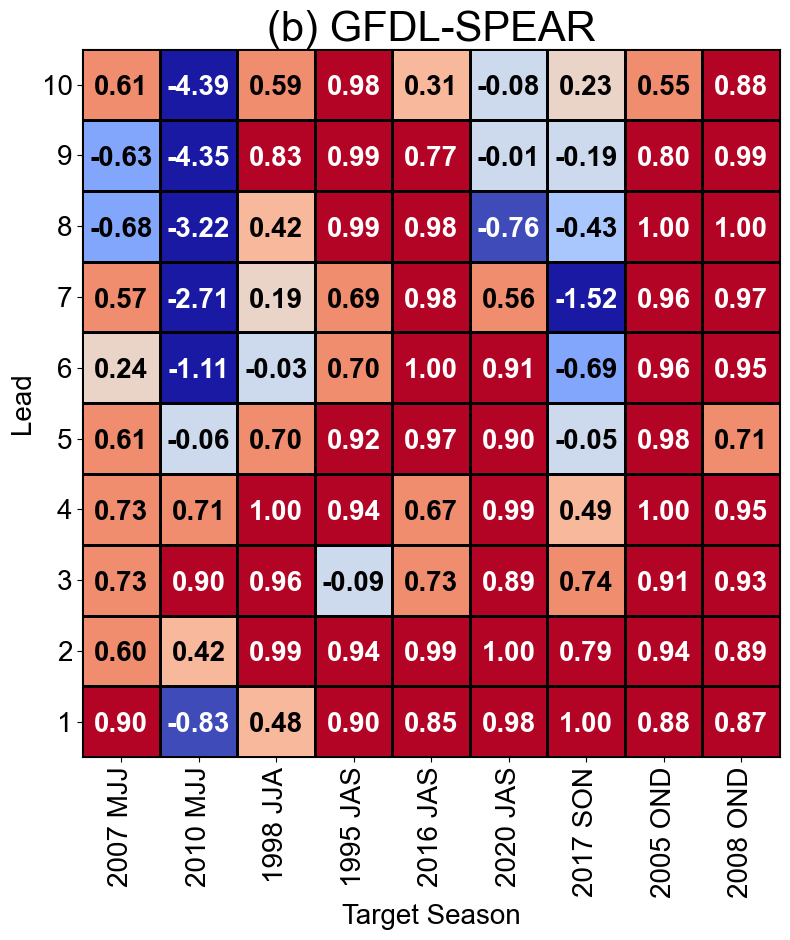

In [261]:
#gfdl_cold 

# Extract the x and y values
x = np.arange(len(gfdl_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(gfdl_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = gfdl_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(b) GFDL-SPEAR', size=30)

# Adjust y-ticks to show original string labels
y_labels = gfdl_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=gfdl_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/gfdl_Cold_Onset_SESS.svg', format='svg')

plt.show()


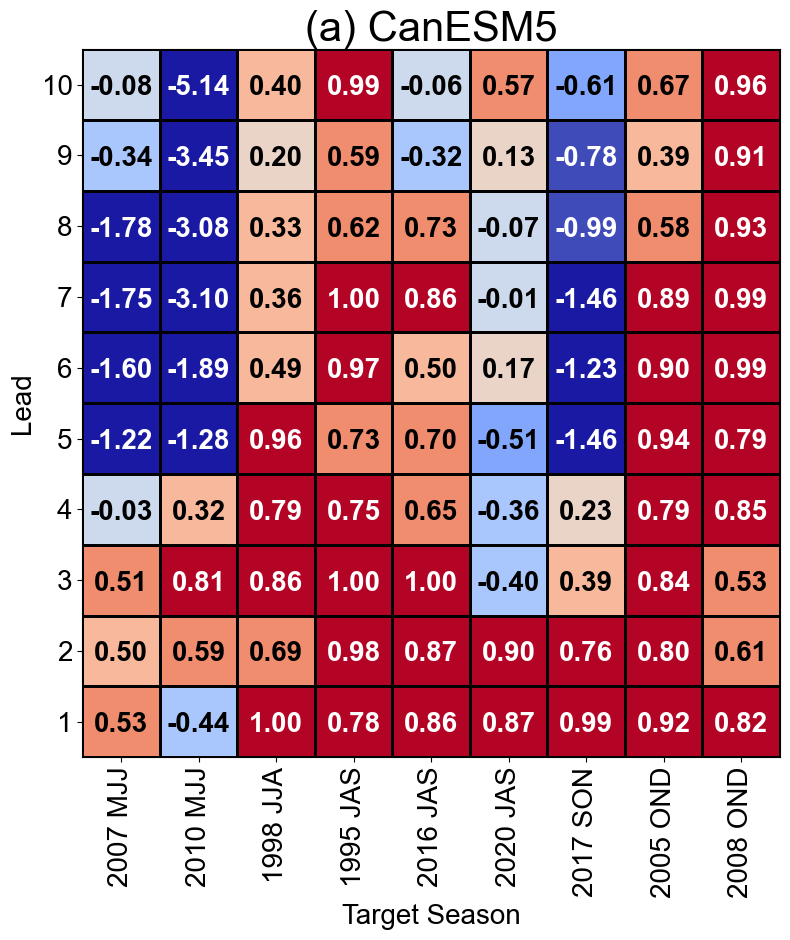

In [262]:
#canesm_cold 

# Extract the x and y values
x = np.arange(len(canesm_cold_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canesm_cold_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_cold_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=30)

# Adjust y-ticks to show original string labels
y_labels = canesm_cold_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_cold_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/canesm_Cold_Onset_SESS.svg', format='svg')

plt.show()


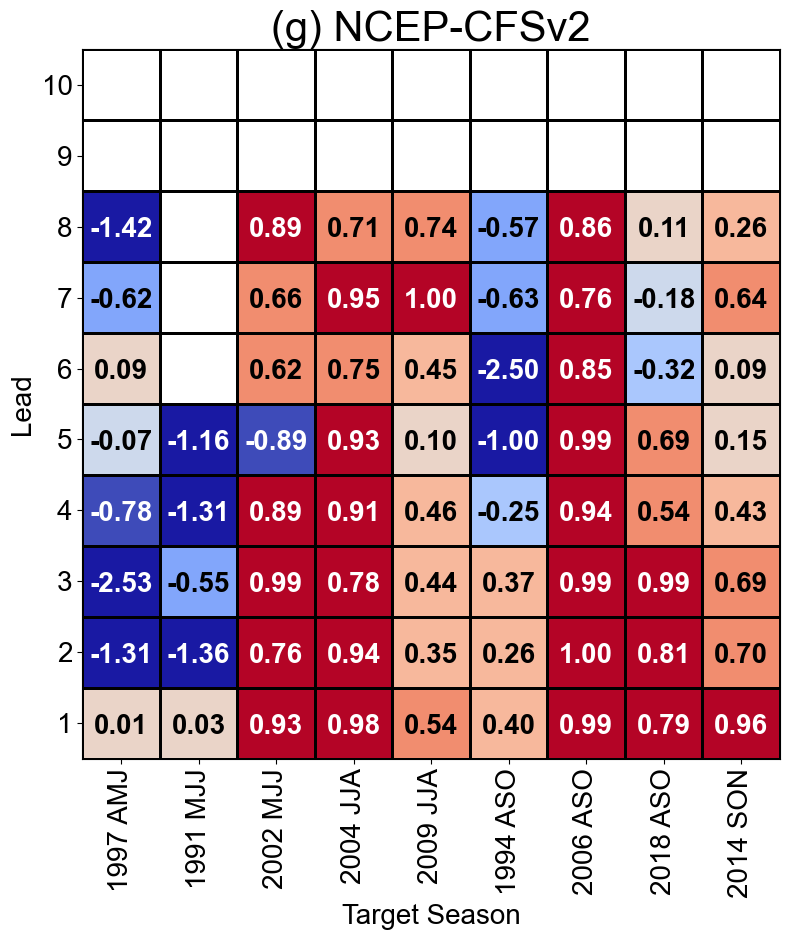

In [263]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(ncep_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(ncep_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = ncep_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(g) NCEP-CFSv2', size=30)

# Adjust y-ticks to show original string labels
y_labels = ncep_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=ncep_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/ncep_Warm_Onset_SESS.svg', format='svg')

plt.show()


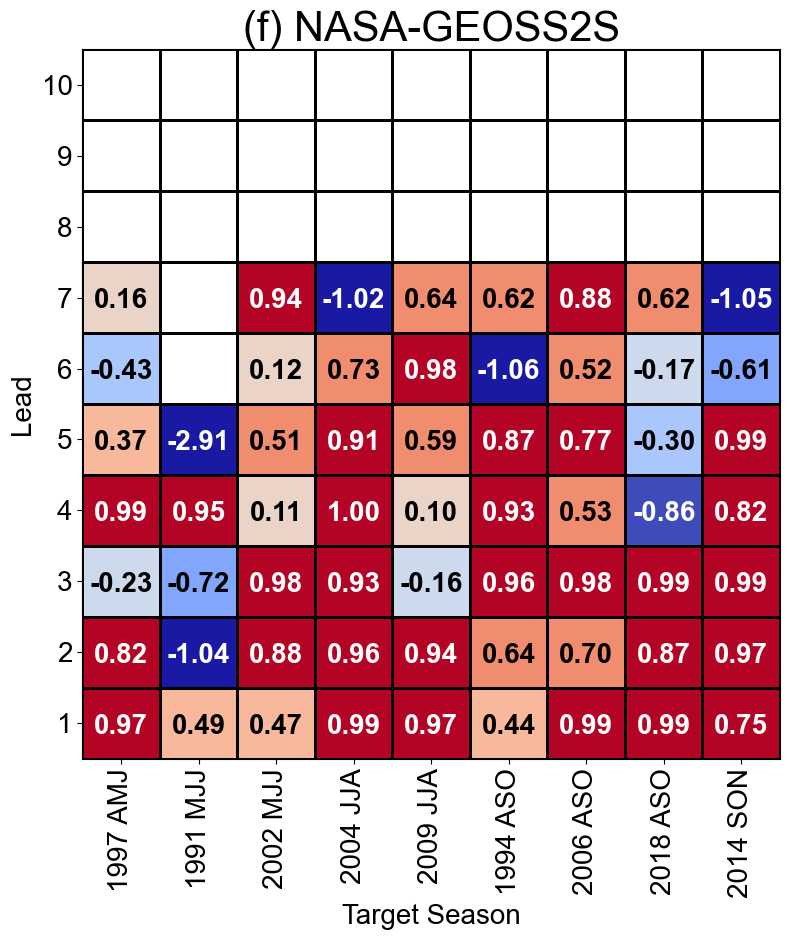

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(nasa_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nasa_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = nasa_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(f) NASA-GEOSS2S', size=30)

# Adjust y-ticks to show original string labels
y_labels = nasa_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nasa_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/nasa_Warm_Onset_SESS.svg', format='svg')

plt.show()


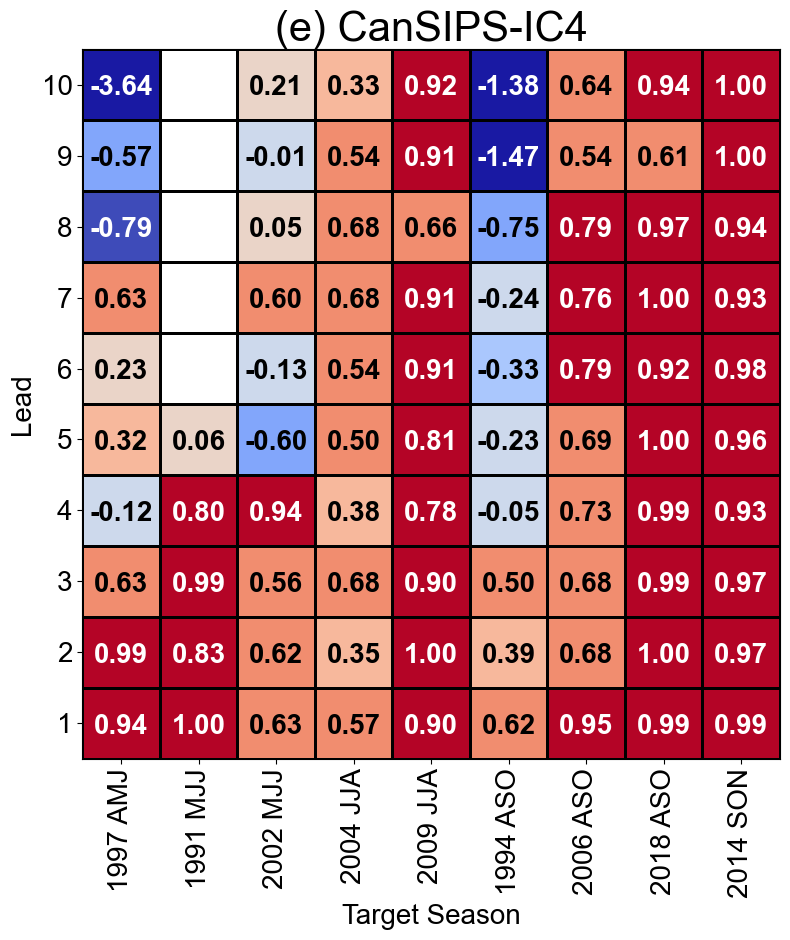

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canada_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canada_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canada_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(e) CanSIPS-IC4', size=30)

# Adjust y-ticks to show original string labels
y_labels = canada_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canada_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/canada_Warm_Onset_SESS.svg', format='svg')

plt.show()


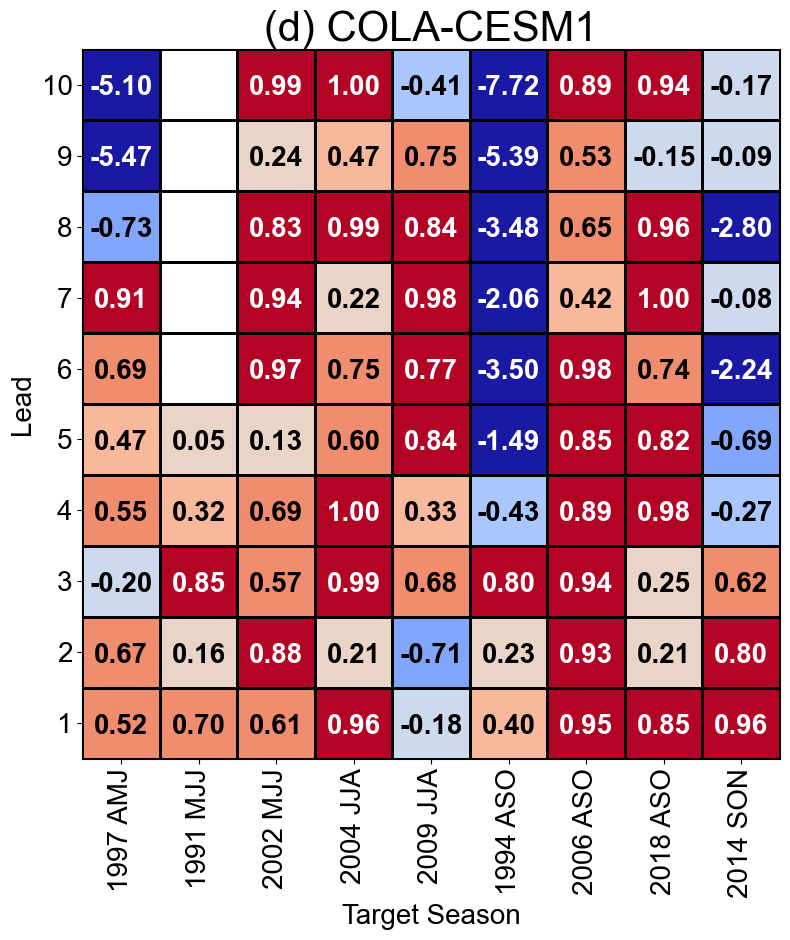

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(cola_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(cola_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = cola_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(d) COLA-CESM1', size=30)

# Adjust y-ticks to show original string labels
y_labels = cola_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=cola_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/cola_Warm_Onset_SESS.svg', format='svg')

plt.show()


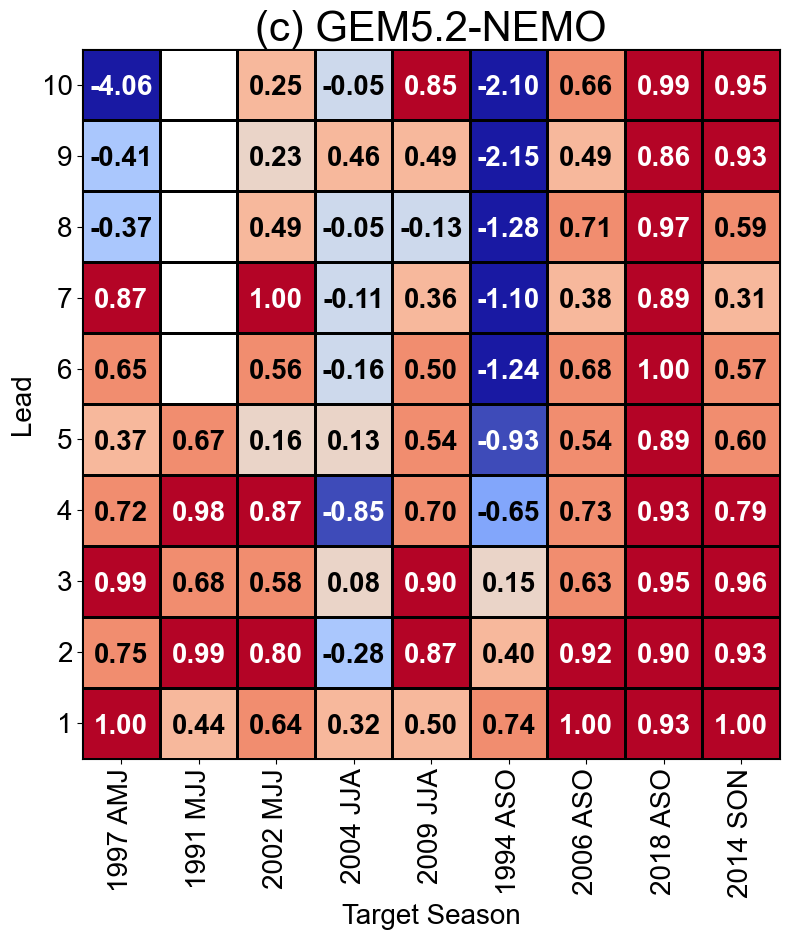

In [267]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(nemo_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(nemo_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = nemo_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(c) GEM5.2-NEMO', size=30)

# Adjust y-ticks to show original string labels
y_labels = nemo_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=nemo_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/nemo_Warm_Onset_SESS.svg', format='svg')

plt.show()


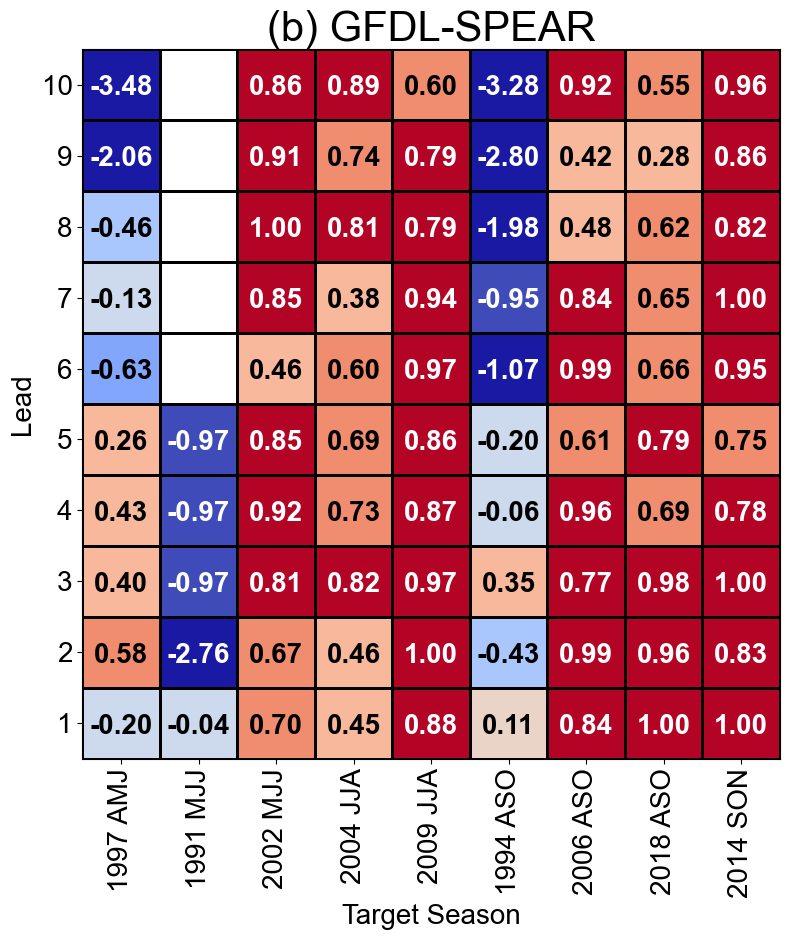

In [268]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(gfdl_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(gfdl_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = gfdl_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(b) GFDL-SPEAR', size=30)

# Adjust y-ticks to show original string labels
y_labels = gfdl_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=gfdl_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/gfdl_Warm_Onset_SESS.svg', format='svg')

plt.show()


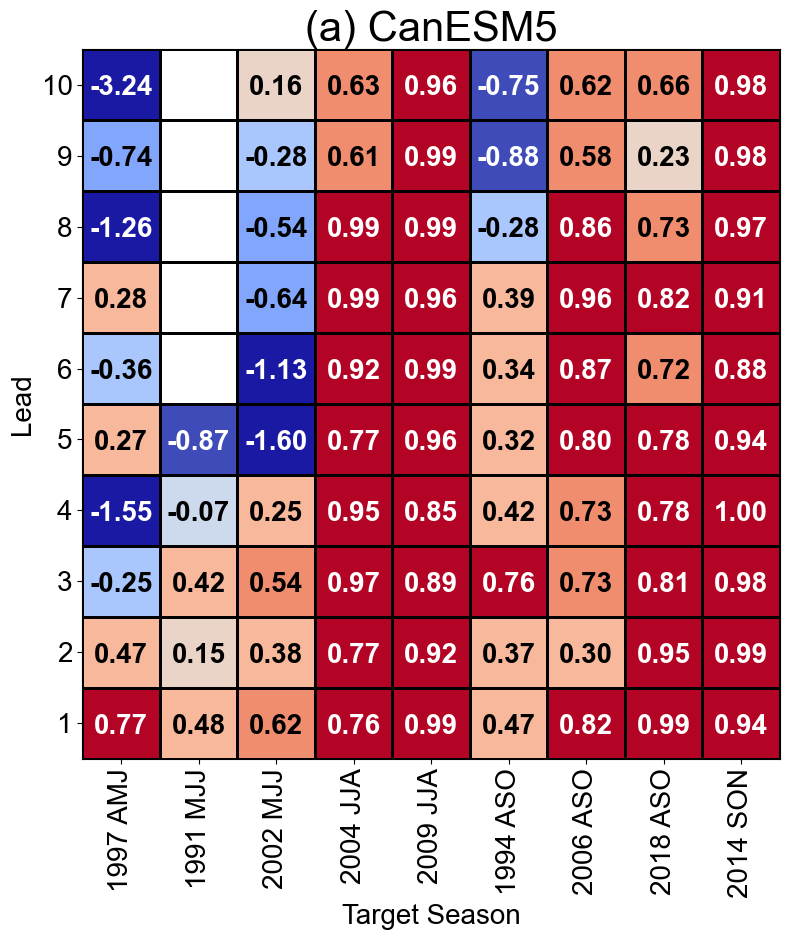

In [269]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, Normalize, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # This is a placeholder, should be replaced with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,9.5))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar
#cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal')
#cbar.ax.set_xticklabels(['< -1'] + [f'{b:.2f}' for b in boundaries[1:]])  # Custom labels for colorbar

# Add labels and title
plt.ylabel('Lead', size=20)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=30)

# Adjust y-ticks to show original string labels
y_labels = canesm_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299*r + 0.587*g + 0.114*b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/canesm_Warm_Onset_SESS.svg', format='svg')

plt.show()


In [270]:
gfdl_cold_onset.describe()

L                  MON                  TAR       SESS
count  90.000000                   90                   90  90.000000
mean    6.000000  2008-08-05 20:00:00  2009-02-03 05:20:00   0.391517
min     1.500000  1994-10-01 00:00:00  1995-08-15 00:00:00  -4.389310
25%     3.500000  2005-03-08 18:00:00  2005-11-15 00:00:00   0.333679
50%     6.000000  2008-05-16 12:00:00  2008-11-15 00:00:00   0.775475
75%     8.500000  2016-04-23 12:00:00  2016-08-15 00:00:00   0.956704
max    10.500000  2020-07-01 00:00:00  2020-08-15 00:00:00   1.000000
std     2.888373                  NaN                  NaN   1.046817

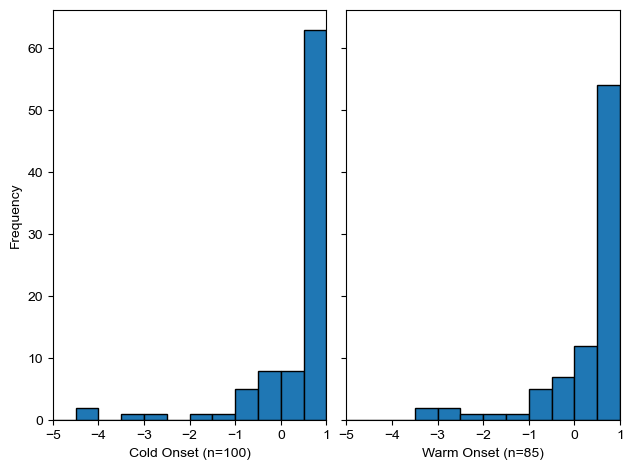

In [271]:
n_bins = 12
bin_edges = np.linspace(-5, 1, n_bins + 1)

dist1 = gfdl_cold_onset['SESS']
dist2 = gfdl_warm_onset['SESS']
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
xmin = -5
xmax = 1 

axs[0].hist(dist1, bins=bin_edges, edgecolor='black')
axs[1].hist(dist2, bins=bin_edges, edgecolor='black')
axs[0].set_xlim([xmin, xmax])
axs[1].set_xlim([xmin, xmax])
axs[0].set_xlabel('Cold Onset (n=100)')
axs[1].set_xlabel('Warm Onset (n=85)')
axs[0].set_ylabel('Frequency')
plt.show()

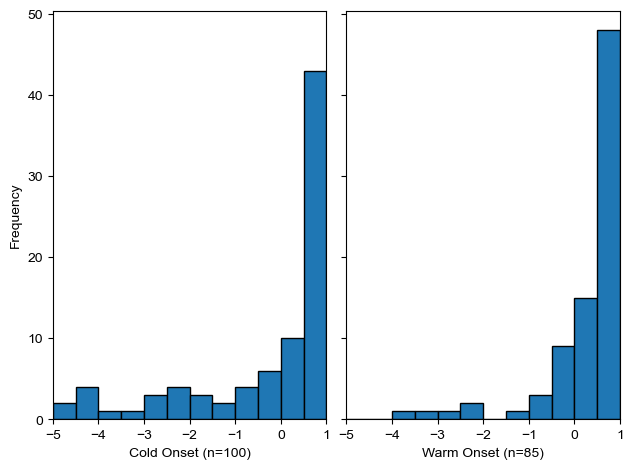

In [272]:
n_bins = 12
bin_edges = np.linspace(-5, 1, n_bins + 1)

dist1 = cola_cold_onset['SESS']
dist2 = cola_warm_onset['SESS']
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
xmin = -5
xmax = 1 

axs[0].hist(dist1, bins=bin_edges, edgecolor='black')
axs[1].hist(dist2, bins=bin_edges, edgecolor='black')
axs[0].set_xlim([xmin, xmax])
axs[1].set_xlim([xmin, xmax])
axs[0].set_xlabel('Cold Onset (n=100)')
axs[1].set_xlabel('Warm Onset (n=85)')
axs[0].set_ylabel('Frequency')
plt.show()

In [273]:
bins = [-float('inf'), 0, 1]
dfs = [gfdl_cold_onset, gfdl_warm_onset, 
       cola_cold_onset, cola_warm_onset,
       nasa_cold_onset, nasa_warm_onset, 
       ncep_cold_onset, ncep_warm_onset,  
       canada_cold_onset, canada_warm_onset, 
       canesm_cold_onset, canesm_warm_onset,
       nemo_cold_onset, nemo_warm_onset]

bin_summary = pd.DataFrame()
for df in dfs:
    # Cut the SESS column into the defined bins
    df['SESS_binned'] = pd.cut(df['SESS'], bins)

    # Count the occurrences in each bin
    bin_counts = df['SESS_binned'].value_counts().sort_index()

    # Calculate the percentages
    total_rows = len(df)
    bin_percentages = (bin_counts / total_rows) * 100

    # Combine counts and percentages into a DataFrame
    summary_df = pd.DataFrame({
        f'{df.columns[0]}_Count': bin_counts,
        f'{df.columns[0]}_Percentage': bin_percentages
    })

    # Concatenate the summary_df to bin_summary horizontally
    bin_summary = pd.concat([bin_summary, summary_df], axis=1)
# Display the summary
bin_summary.to_csv('../Resources/bim_summary.csv')

In [274]:
medians = [df['SESS'].median() for df in dfs]
median_df = pd.DataFrame([medians], columns=[f'{df.columns[0]}_Median' for df in dfs])

median_df.to_csv('../Resources/median_row_SESS.csv', index=False)

In [275]:
#ADD the top size of Nasa and NCEP-CFSv2
#GET PERCENTAGES of Positive / Negative
#crosschecking:
    #rlly oddL: ALL BLUE column, only blue at bottom
    #we check that particular INITIALIZATION
#check that initialization, and then we look at EACH MEMBER. 
#for 1998 JJA: is there a member that is TRIPPIN? 
#FIRST CHECK:
    #1st. fixed point: 30 year climatology. DOESNT CHANGE
    #2nd. Forecast (F')
    #3rd. OBS (O') DOENST CHANGE
    #4th. VERY IMPORTANT: WHY IS F' SO BAD? Check M1-M15 or M-M20. Check each member. Very carefully check these odd numbers. 
    #ALL MEMBERS at ALL LEAD TIMES
    #-> generate Plume

#Spacial Maps of SESS -> Find out where the hindcast is really wrong. 
#Check Paper from Mike: Excessive momentum in ENSO: goes too far from early spring observation
#This is important analysis... excessive momentum after spring.. 


In [276]:
monthly_obs

MON  NINO1+2_L3   NINO3_L3  NINO3.4_L3   NINO4_L3  SZN  VARIANCE1+2_L3  \
0     2   25.717667  26.422444   26.859889  28.279111  JFM        0.633224   
1     3   26.041222  27.063111   27.284667  28.381778  FMA        0.687875   
2     4   25.479778  27.345222   27.678333  28.621556  MAM        0.969434   
3     5   24.358667  27.150444   27.826222  28.837556  AMJ        1.243217   
4     6   23.166333  26.558444   27.651111  28.928111  MJJ        1.278459   
5     7   22.029889  25.847444   27.291667  28.885333  JJA        1.215305   
6     8   21.230444  25.274778   26.955667  28.816111  JAS        1.155230   
7     9   20.918111  25.000333   26.763333  28.770111  ASO        1.097573   
8    10   21.135889  24.995222   26.712556  28.739667  SON        1.217331   
9    11   21.832889  25.104667   26.672667  28.665667  OND        1.309250   
10   12   23.010222  25.322111   26.598889  28.500333  NDJ        1.201736   
11    1   24.495222  25.772667   26.648667  28.370222  DJF        0.822973   

    VARIANCE3_L3  VARIANCE3.4_L3  VARIANCE4_L3  
0       0.722083        0.911147      0.602424  
1       0.438982        0.569984      0.483076  
2       0.314258        0.338432      0.351696  
3       0.300520        0.256750      0.272307  
4       0.356976        0.281245      0.238351  
5       0.489432        0.401165      0.252990  
6       0.671820        0.576438      0.303363  
7       0.879021        0.797956      0.397474  
8       1.143673        1.057599      0.521443  
9       1.366630        1.304206      0.646976  
10      1.389889        1.402310      0.710849  
11      1.095406        1.230987      0.681446

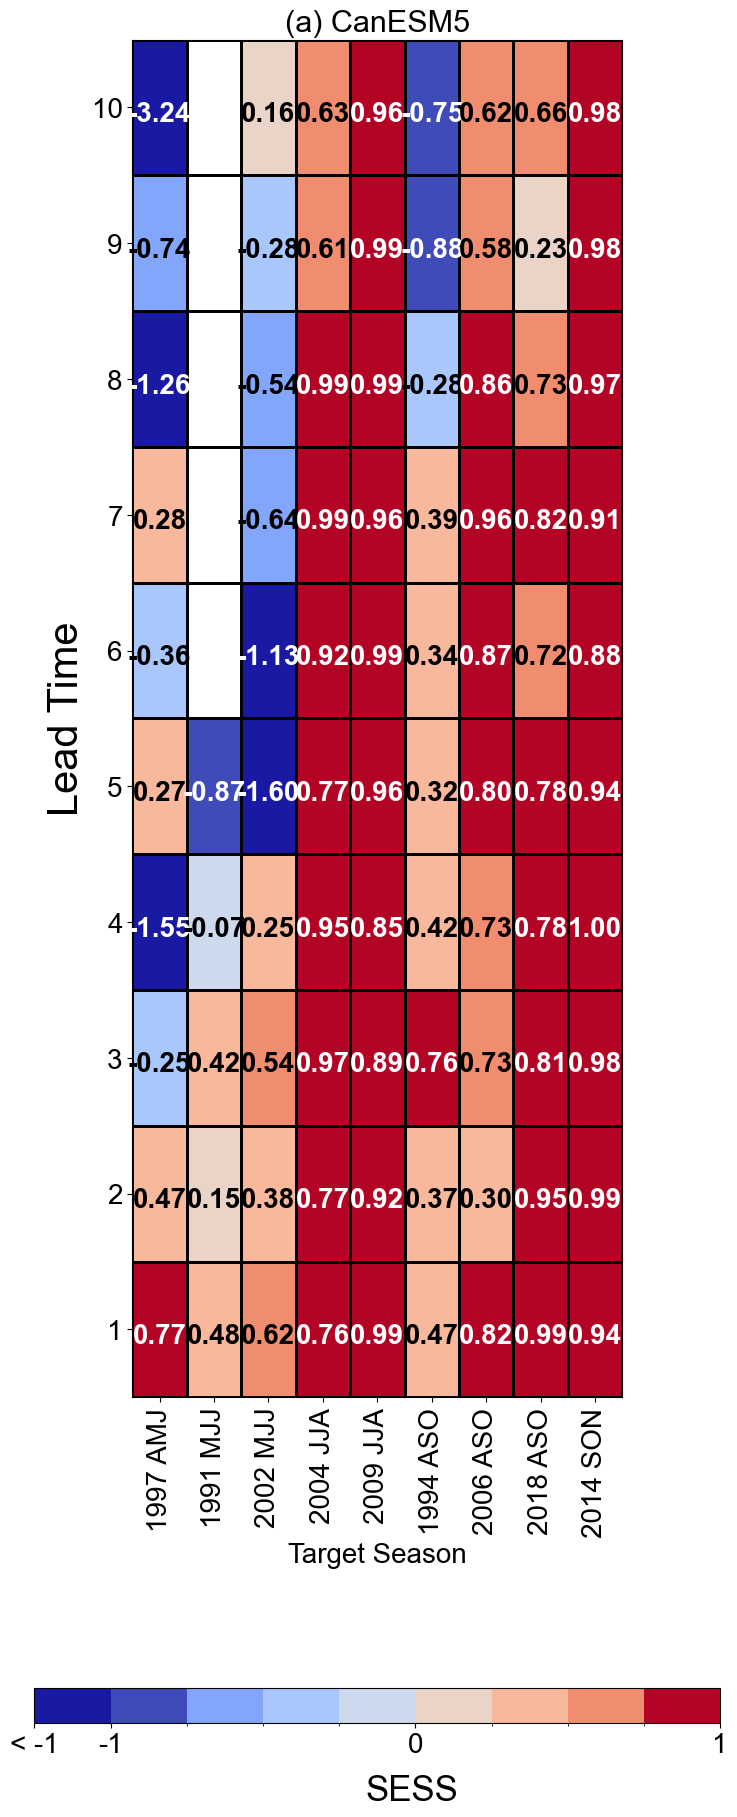

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, to_rgba, ListedColormap

# Extract the x and y values
x = np.arange(len(canesm_warm_mesh.columns))  # Numerical indices for Lead times (L)
y = np.arange(len(canesm_warm_mesh.index))    # Numerical indices for Target times (TAR)
Z = canesm_warm_mesh.values

# Create a custom colormap
cmap = plt.get_cmap('coolwarm')
new_colors = cmap(np.linspace(0, 1, 10))
dark_blue = np.array([0, 0, 0.6, 0.9])  # Darker shade of blue
regular_blue = np.array([0.243137, 0.294118, 0.725490, 1.0])  # Placeholder, replace with actual color

# Replace the first two colors
new_colors[0] = dark_blue  # Dark blue for the first color
new_colors[1] = regular_blue  # Regular blue for the second color
custom_cmap = ListedColormap(new_colors)

boundaries = np.arange(-1.25, 1.25, 0.25)  # Boundaries from -1.25 to 1 with interval of 0.25
norm = BoundaryNorm(boundaries, ncolors=custom_cmap.N, clip=False)

# Create the meshgrid
x_mesh, y_mesh = np.meshgrid(x, y)

# Plot using pcolormesh
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.figure(figsize=(8,20))
c = plt.pcolormesh(x_mesh, y_mesh, Z, cmap=custom_cmap, norm=norm, shading='auto', edgecolors='black', linewidth=1)

# Add color bar with customization options
cbar = plt.colorbar(c, label='SESS', boundaries=boundaries, ticks=boundaries, orientation='horizontal', aspect=20, shrink=1.4)
cbar.ax.tick_params(labelsize=20)
cbar.set_label('SESS', fontsize=25)
cbar.set_ticks([-1.25, -1, 0, 1])  # Define the positions of the ticks
cbar.set_ticklabels(['< -1', '-1', '0', '1'])  # Set custom labels
cbar.ax.xaxis.set_label_coords(0.55, -1.5)

# Customize colorbar tick parameters
#cbar.ax.tick_params(labelsize=15, length=10, width=2)  # Change the font size, tick length, and tick width here

# Add labels and title
plt.ylabel('Lead Time', size=30)
plt.xlabel('Target Season', size=20)
plt.title('(a) CanESM5', size=22)

# Adjust y-ticks to show original string labels
y_labels = canesm_warm_mesh.index.tolist()
adjusted_y_labels = [str(int(label)) if label != 'OBS' else label for label in y_labels]
plt.yticks(ticks=y, labels=adjusted_y_labels, size=20)

# Adjust x-ticks to show original string labels
plt.xticks(ticks=x, labels=canesm_warm_mesh.columns, rotation=90, size=20)

def get_text_color(background_color):
    r, g, b, _ = background_color
    luminance = 0.299 * r + 0.587 * g + 0.114 * b
    return 'black' if luminance > 0.5 else 'white'

# Add text annotations with bold font
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        background_color = to_rgba(custom_cmap(norm(Z[i, j])))
        text_color = get_text_color(background_color)
        plt.text(j + 0.0, i - 0.05, f'{Z[i, j]:.2f}', ha='center', va='center', color=text_color, fontsize=20, fontweight='bold')

plt.tight_layout()
plt.savefig(f'../Plots/SESS/ERRORBAR.svg', format='svg')

plt.show()


##### 

##### 